<center style="font-size: 30px;">KLASYFIKACJA W ROZPOZNAWANIU NOWOTWORÓW SKÓRY</center>
          

<center style="font-size: 30px;">Autorzy</center>
<center>Yan Dubina, 191666 <br></center>
<center>Konrad Maleńczak, 205844 <br></center>
<center>Michał Roman, 205858 <br></center>
<center>Adrian Rostek, 205860 <br></center>
<center>Mariusz Sikora, 205863 <br></center>

<font size="6">Spis treści</font><br>
* [Streszczenie](#chapter1)
* [Wprowadzenie](#chapter11)
* [Cel badania](#chapter12)
* [Wstępna analiza danych](#chapter2)
    * [Instalacja bibliotek](#chapter3)
    * [Przedstawienie dostępnych zmiennych](#section_3_1)
    * [Statystyki opisowe](#section_3_2)
        * [Macierz korelacji](#section_3_2_1)
    * [Podstawowa wizualizacja](#section_3_3)
    * [Obserwacje odstające](#section_3_4)
    * [Transformacje danych](#section_3_5)
        * [Logarytmowanie](#section_3_5_1)
        * [Standaryzacja](#section_3_5_2)
        * [Unitaryzacja](#section_3_5_3)
    * [Braki Danych](#section_3_6)
* [Klasyfikacja](#chapter4)
    * [Metoda: SVM](#section_4_1)
    * [Metoda: Las losowy](#section_4_2)
    * [Metoda: Regresja logistyczna](#section_4_3)
    * [Metoda: KNN](#section_4_4)
    * [Metoda: Naiwny Bayes](#section_4_5)
    * [Metoda: Hybrydowa](#section_4_6)
* [Rezultaty](#chapter5)
    * [Mierniki](#section_5_1)
    * [Walidacja wykorzystanych metod](#section_5_2)
        * [Walidacja SVM](#section_5_2_1)
        * [Walidacja Lasu losowego](#section_5_2_2)
        * [Walidacja Regresji](#section_5_2_3)
        * [Walidacja kNN](#section_5_2_4)
        * [Walidacja Bayesa](#section_5_2_5)
        * [Zestawienie wyników walidacji](#section_5_2_6)
    * [Macierze Pomyłek](#section_5_3)
* [Podsumowanie rezultatów](#chapter51)
* [Przykład użycia modeli na sztucznych obserwacjach](#chapter6)
* [Bibliografia](#chapter7)

# Streszczenie <a class="anchor" id="chapter1"></a>

W naszej pracy spróbowaliśmy określić czy dana zmiana skórna, przedstawiona na zdjęciu, jest zmianą nowotworową czy nie. W tym celu zastosowaliśmy analizę obrazu oraz różne metody klasyfikacyjne uczenia maszynowego. Każde zdjęcie analizujemy wydobywając z niego wartości 44 cech, które są następnie przekazywane do: SVM, Random Forest, regresji logistycznej, naiwnego klasyfikatora Bayesa oraz metody kNN. Wybranym przez nas zestawem danych został dataset HAM10000, który zawiera około 10000 zdjęć przedstawiających: znamiona melanocytowe (pieprzyki), guzy (znamiona nie nowotworowe), jak również nowotwory, takie jak czerniak, rak podstawnokomórkowy czy rak śródnabłonkowy. Na podstawie tych danych każdy z algorytmów stara się przyporządkować każde przyszłe zdjęcie do grupy 0 - brak raka lub 1 - rak.

Dla każdej z metod obliczony został również wskażnik Accuracy, a także czułość, precyzja i F1-score z macierzy pomyłek, na podstawie których możemy dostrzec, że skuteczność różnych metod, jak również możliwość wykorzystania ich w konkretnych sytuacjach może znacząco odbiegać do pozostałych.

<b>Słowa kluczowe:</b><br>
rak skóry, analiza obrazu, machine learning, logarytmowanie, standaryzacja, unitaryzacja, metody klasyfikacji, SVM, las losowy, regresja logistyczna, kNN, metoda naiwnego Bayesa, metoda hybrydowa, walidacja metod klasyfikacji, sztuczne obserwacje

# Wprowadzenie <a class="anchor" id="chapter11"></a>

Rak skóry pomimo swojej niższej, względem raka innych narządów, śmiertelnośći jest poważnym problemem, za sprawą zbyt późnego wykrywania go. Jest to choroba rozwijająca się stopniowo i dająca się stosunkowo łatwo wykryć i wyleczyć, jednak często nowe zmiany skórne są przez ludzi bagatelizowane, w efekcie czego diagnozy następują często znacznie później niż powinny.<br>
Motywacją do przeprowadzenia tego badania jest chęć niesienia pomocy ludziom, poprzez ułatwienie im dostępu do narzędzi umożliwiających im diagnozę przedszpitalną zauważonych na skórze zmian, takich jak nowe odbarwienia czy zmieniające kształt pieprzyki. Przeprowadzona przez nas analiza może posłużyć za wczesne przyjrzenie się problemowi analizy zmian naskórnych i klasyfikacji przypadków na podstawie wygenerowanych cech zdjęć tych zmian, oraz wskazać najlepszą do tego celu przyrządów (metoda klasyfikacji, istotne cechy, etc).

Na podstawie otrzymanych przez nas wyników możliwe jest kontynuowanie analizy tematu i może w przyszłości stworzenie narzędzia (np. aplikacji na telefon) służącego właśnie do przedszpitalnej analizy zauważonych na skórze zmian.

# Cel badania <a class="anchor" id="chapter12"></a>

Celem naszego badania jest przeprowadzenie analizy posiadanych obrazów pod kątem występowania zmian nowotworowych oraz klasyfikacja na podstawie wygenerowanych danych z użyciem kilku różnych metod klasyfikacji.

# WSTĘPNA ANALIZA DANYCH <a class="anchor" id="chapter2"></a>

## INSTALACJA BIBLIOTEK <a class="anchor" id="chapter3"></a>

W naszym projekcie zastosowaliśmy kilka bibliotek, z których możemy wymienić:

- numpy
- pandas
- scikit
- matplotlib
- seaborn

W dalszej części projektu będziemy z korzystać z numpy i pandas do manipulowania danymi oraz matplotlib i seaborn do wizualiacji danych, a scikit posłuży nam do użycia modeli uczenia maszynowego na naszych danych.

W celu ich instalacji należy wykonać poniższy kod:

In [1]:
import subprocess
import sys

subprocess.check_call([sys.executable, "-m", "pip", "install", "-U", "scikit-learn"])
subprocess.check_call([sys.executable, "-m", "pip", "install", "matplotlib"])
subprocess.check_call([sys.executable, "-m", "pip", "install", "seaborn"])
subprocess.check_call([sys.executable, "-m", "pip", "install", "pandas"])
subprocess.check_call([sys.executable, "-m", "pip", "install", "numpy"])

Requirement already up-to-date: scikit-learn in /home/jupiter/.local/lib/python3.8/site-packages (1.1.1)


0

## PRZEDSTAWIENIE DOSTĘPNYCH ZMIENNYCH <a class="anchor" id="section_3_1"></a>

Jak wspomnieliśmy, z każdego zdjęcia wydobywany jest szereg wartości cech, które prezentują się nastepująco:

Cechy bazujące na rozłożeniu klastrów opartych na wartościach składowych przestrzeni kolorów Lab:
- Pierwsza centroida klastra a*
- Druga centroida klastra a*
- Trzecia centroida klastra a*
- Pierwsza centroida klastra b*
- Druga centroida klastra b*
- Trzecia centroida klastra b*

Cechy bazujące na odchyleniach standardowych składowych Lab:
- Odchylenie standardowe lab: L
- Odchylenie standardowe lab: a*
- Odchylenie standardowe lab: b*

Cechy bazujące na macierzy GLCM (Gray Level Co-occurrence Matrix, służąca do analizy tekstury obrazu):
- GLCM kontrast	
- GLCM odmienność
- GLCM homogeniczność
- GLCM energia
- GLCM korelacja

Cechy bazujące na sporządzonych histogramach występowania składowych Lab:
- Histogram średnia lab: L
- Histogram średnia lab: a*
- Histogram średnia lab: b*
- Histogram wariancja lab: L
- Histogram wariancja lab: a*
- Histogram wariancja lab: b*
- Histogram skośność lab: L
- Histogram skośność lab: a*
- Histogram skośność lab: b*
- Histogram kurtoza lab: L
- Histogram kurtoza lab: b*
- Histogram entropia lab: L

Cechy bazujące na histogramie gradientów (HoG):
- Histogram gradientów: średnia
- Histogram gradientów: odchylenie standardowe

Cechy bazujące na analizie wykrytych na obrazach krawędzi:
- Gęstość krawędzi
- Średnia rgb na krawędziach: czerwony
- Średnia rgb na krawędziach: zielony
- Średnia rgb na krawędziach: niebieski
- Odchylenie standardowe rgb na krawędziach: czerwony
- Odchylenie standardowe rgb na krawędziach: zielony
- Odchylenie standardowe rgb na krawędziach: niebieski

Cechy bazujące na analizie występujących na obrazach krzywizn:
- Średnia krzywizn: spherical cup	
- Średnia krzywizn: through
- Średnia krzywizn: rut
- Średnia krzywizn: saddle rut
- Średnia krzywizn: saddle
- Średnia krzywizn: saddle ridge
- Średnia krzywizn: ridge
- Średnia krzywizn: dome
- Średnia krzywizn: spherical cap

Wartosci tych cech wydobyte ze zdjęć z naszej bazy zdjęć, zapisane w pliku csv, możemy odczytać przy użyciu następująco kodu:

In [2]:
import pandas as pd
import numpy as np

nazwy_kolumn = ['Rak', 'Pierwsza centroida klastra a*', 'Druga centroida klastra a*', 'Trzecia centroida klastra a*', 'Pierwsza centroida klastra b*', 'Druga centroida klastra b*', 'Trzecia centroida klastra b*', 'Odchylenie standardowe lab: L', 'Odchylenie standardowe lab: a*', 'Odchylenie standardowe lab: b*', 'GLCM kontrast', 'GLCM odmienność', 'GLCM homogeniczność', 'GLCM energia', 'GLCM korelacja', 'Histogram średnia lab: L', 'Histogram średnia lab: a*', 'Histogram średnia lab: b*', 'Histogram wariancja lab: L', 'Histogram wariancja lab: a*', 'Histogram wariancja lab: b*', 'Histogram skośność lab: L', 'Histogram skośność lab: a*', 'Histogram skośność lab: b*', 'Histogram kurtoza lab: L', 'Histogram kurtoza lab: b*', 'Histogram entropia lab: L', 'Histogram gradientów: średnia', 'Histogram gradientów: odchylenie standardowe', 'Gęstość krawędzi', 'Średnia rgb na krawędziach: czerwony', 'Średnia rgb na krawędziach: zielony', 'Średnia rgb na krawędziach: niebieski', 'Odchylenie standardowe rgb na krawędziach: czerwony', 'Odchylenie standardowe rgb na krawędziach: zielony', 'Odchylenie standardowe rgb na krawędziach: niebieski', 'Średnia krzywizn: spherical cup', 'Średnia krzywizn: through', 'Średnia krzywizn: rut', 'Średnia krzywizn: saddle rut', 'Średnia krzywizn: saddle', 'Średnia krzywizn: saddle ridge', 'Średnia krzywizn: ridge', 'Średnia krzywizn: dome', 'Średnia krzywizn: spherical cap']
wszystkie_dane = pd.read_csv('../cechy/cechy_wszystkie.csv', sep=';', names=nazwy_kolumn)
cechy = wszystkie_dane.drop(['Rak'], axis=1)

In [3]:
pd.set_option('display.max_columns', None)  # Wymusza pokaznie wszystkich kolumn
wszystkie_dane

,Rak,Pierwsza centroida klastra a*,Druga centroida klastra a*,Trzecia centroida klastra a*,Pierwsza centroida klastra b*,Druga centroida klastra b*,Trzecia centroida klastra b*,Odchylenie standardowe lab: L,Odchylenie standardowe lab: a*,Odchylenie standardowe lab: b*,GLCM kontrast,GLCM odmienność,GLCM homogeniczność,GLCM energia,GLCM korelacja,Histogram średnia lab: L,Histogram średnia lab: a*,Histogram średnia lab: b*,Histogram wariancja lab: L,Histogram wariancja lab: a*,Histogram wariancja lab: b*,Histogram skośność lab: L,Histogram skośność lab: a*,Histogram skośność lab: b*,Histogram kurtoza lab: L,Histogram kurtoza lab: b*,Histogram entropia lab: L,Histogram gradientów: średnia,Histogram gradientów: odchylenie standardowe,Gęstość krawędzi,Średnia rgb na krawędziach: czerwony,Średnia rgb na krawędziach: zielony,Średnia rgb na krawędziach: niebieski,Odchylenie standardowe rgb na krawędziach: czerwony,Odchylenie standardowe rgb na krawędziach: zielony,Odchylenie standardowe rgb na krawędziach: niebieski,Średnia krzywizn: spherical cup,Średnia krzywizn: through,Średnia krzywizn: rut,Średnia krzywizn: saddle rut,Średnia krzywizn: saddle,Średnia krzywizn: saddle ridge,Średnia krzywizn: ridge,Średnia krzywizn: dome,Średnia krzywizn: spherical cap
0,0,20.565352,15.416032,25.651017,15.180350,-8.279254,1.822145,5.503254,3.832311,8.597863,66.567828,5.927059,0.174084,0.026816,0.905070,64.086798,22.709507,4.660727,30.334862,14.777464,73.827736,3.585179,5.029178,4.028071,10.963890,15.415139,13.747970,0.067917,0.133298,0.034563,202.888234,151.099979,164.617660,14.415444,22.507482,33.443544,0.014285,0.032130,0.072730,0.046674,0.041944,0.043715,0.067178,0.028867,0.011870
1,0,8.187255,13.065371,29.342724,-3.423734,20.672433,4.210845,6.770759,7.621313,9.930449,49.483201,4.008138,0.285125,0.032340,0.978147,56.706267,25.310690,12.927050,45.905022,58.199595,98.701030,2.942819,3.319105,4.482198,6.239605,23.692736,12.259080,0.057440,0.149791,0.019167,178.687729,140.409082,140.544734,35.292931,38.732525,44.905258,0.001985,0.006604,0.010707,0.007326,0.007411,0.009530,0.012648,0.004844,0.001378
2,0,17.169178,23.772401,5.912210,1.883422,-7.783127,-14.715322,0.000000,0.000000,0.000000,90.009191,6.545236,0.205698,0.021568,0.988888,64.500000,26.500000,-4.500000,0.000000,0.000000,0.000000,-1.000004,-1.000008,1.000330,-1.999991,-1.999055,14.212260,0.091488,0.171588,0.030270,164.638566,121.512297,144.040377,49.789190,41.405590,40.829112,0.000004,0.000000,0.000015,0.000000,0.000015,0.000000,0.000000,0.000000,0.000000
3,0,8.370949,5.754524,12.241755,-6.858576,5.513277,-2.745287,6.167963,3.561355,5.844130,166.548090,6.386685,0.226351,0.028276,0.887406,49.894971,12.081456,15.760346,38.206491,12.808058,34.221901,1.878767,5.497207,3.314187,5.364414,13.850743,12.630126,0.147411,0.185866,0.060893,145.058877,129.605924,136.520285,29.377147,30.076629,33.933058,0.000393,0.000800,0.002119,0.001181,0.001144,0.001311,0.002178,0.000663,0.000330
4,0,3.328496,16.693381,6.743843,-2.928173,6.443503,1.498677,9.995519,2.550656,5.132814,56.645823,5.195051,0.200312,0.034077,0.937457,44.505706,16.707843,4.146595,99.990134,6.581301,26.551443,1.565204,6.493375,4.674942,-0.059323,20.986444,12.448868,0.047530,0.108283,0.024581,188.461956,166.720205,166.498267,33.738145,44.172807,43.031885,0.001022,0.003715,0.006822,0.004689,0.004033,0.004515,0.005578,0.003341,0.001056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9848,1,29.323708,23.476598,18.844663,21.459633,6.491347,14.265182,0.000000,0.000000,0.000000,89.552986,6.503007,0.160128,0.019975,0.935753,74.500000,29.500000,5.500000,0.000000,0.000000,0.000000,-1.000003,-1.000007,-1.000170,-1.999993,-1.999574,13.938574,0.055625,0.113443,0.035815,206.818511,141.821923,136.693382,28.482863,29.176851,36.841419,0.000004,0.000000,0.000015,0.000000,0.000015,0.000000,0.000000,0.000000,0.000000
9849,1,25.9340

## STATYSTYKI OPISOWE <a class="anchor" id="section_3_2"></a>

Przeglądanie prawie 10 tys. rekordów nie jest dla ludzi zadaniem trywialnym, więc aby łatwiej oddać charakterystykę otrzymanych danych, poniżej zostały obliczone podstawowe statystyki opisowe:

In [4]:
srednia = cechy.mean(axis=0)
mediana = cechy.median(axis=0)
kwartyl1 = cechy.quantile(q=0.25,axis=0)
kwartyl3 = cechy.quantile(q=0.75,axis=0)
rozstep_kw = kwartyl3 - kwartyl1
was_dolny = kwartyl1 - 1.5 * rozstep_kw
was_gorny = kwartyl3 + 1.5 * rozstep_kw
minimum = cechy.min(axis=0)
maksimum = cechy.max(axis=0)
odchylenie_st = cechy.std(axis=0)
skosnosc = cechy.skew(axis=0)
wariancja = cechy.var(axis=0)
wsp_zmiennosci = odchylenie_st/srednia

In [5]:
statystyki = pd.DataFrame({'srednia':srednia,
                           'mediana':mediana,
                           'kwartyl 1':kwartyl1,
                           'kwartyl 3':kwartyl3,
                           'rozstęp kwartylowy':rozstep_kw,
                           'wąs dolny':was_dolny,
                           'wąs górny':was_gorny,
                           'minimum':minimum,
                           'maksimum':maksimum,
                           'odchylenie stand.':odchylenie_st,
                           'skośność':skosnosc,
                           'wariancja':wariancja,
                           'współczynnik zmienności':wsp_zmiennosci
                          })
statystyki

,srednia,mediana,kwartyl 1,kwartyl 3,rozstęp kwartylowy,wąs dolny,wąs górny,minimum,maksimum,odchylenie stand.,skośność,wariancja,współczynnik zmienności
Pierwsza centroida klastra a*,22.525243,21.663967,12.881426,31.242766,18.361340,-14.660585,58.784776,-4.287165,53.227575,11.187375,0.276062,125.157349,0.496659
Druga centroida klastra a*,26.354681,26.296785,16.964594,35.028037,18.063443,-10.130570,62.123201,-4.570445,56.561224,11.820316,0.062133,139.719865,0.448509
Trzecia centroida klastra a*,24.313334,23.570515,15.387835,33.039945,17.652110,-11.090330,59.518110,-2.661969,69.344600,10.931786,0.168822,119.503936,0.449621
Pierwsza centroida klastra b*,6.213744,5.778939,-1.554531,13.393278,14.947809,-23.976244,35.814991,-24.779871,47.512843,10.043849,0.227262,100.878913,1.616393
Druga centroida klastra b*,11.334795,11.739790,3.094342,20.250977,17.156635,-22.640610,45.985929,-66.163199,45.109981,11.352962,-0.306499,128.889745,1.001603
Trzecia centroida klastra b*,8.856834,8.991643,2.056947,15.761437,13.704491,-18.499789,36.318173,-42.895662,43.790582,9.825134,-0.083539,96.533254,1.109328
Odchylenie standardowe lab: L,6.874425,6.944997,5.014477,8.971565,3.957088,-0.921155,14.907197,0.000000,21.088262,3.311504,-0.114276,10.966056,0.481714
Odchylenie standardowe lab: a*,3.495800,3.446786,2.751914,4.260704,1.508791,0.488728,6.523890,0.000000,16.889581,1.649879,0.387179,2.722101,0.471960
Odchylenie standardowe lab: b*,4.632278,4.483838,3.379098,5.852085,2.472987,-0.330383,9.561565,0.000000,29.359568,2.353399,0.688188,5.538487,0.508044
GLCM kontrast,77.107545,48.931533,32.475951,83.451511,50.975559,-43.987387,159.914850,6.156639,2588.733203,108.464643,8.674329,11764.578790,1.406667


### Macierz korelacji <a class="anchor" id="section_3_2_1"></a>

Inną ważną wartością są współczynniki korelcji pomiędzy wartościami cech. Własności te wyrazimy jako macierz korelacji, którą przedstawimy w postaci heatmapy za pomocą funkcji:

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
def rysuj_m_korelacji(dane):
    correlationMatrix = dane.corr().abs()
    plt.figure(figsize = (37,30))
    sns.set(font_scale=2)
    sns.heatmap(correlationMatrix, xticklabels=False, cmap=sns.color_palette("viridis", as_cmap=True))
    plt.show()

Korelacje naszych danych możemy więc przedstawić następująco:

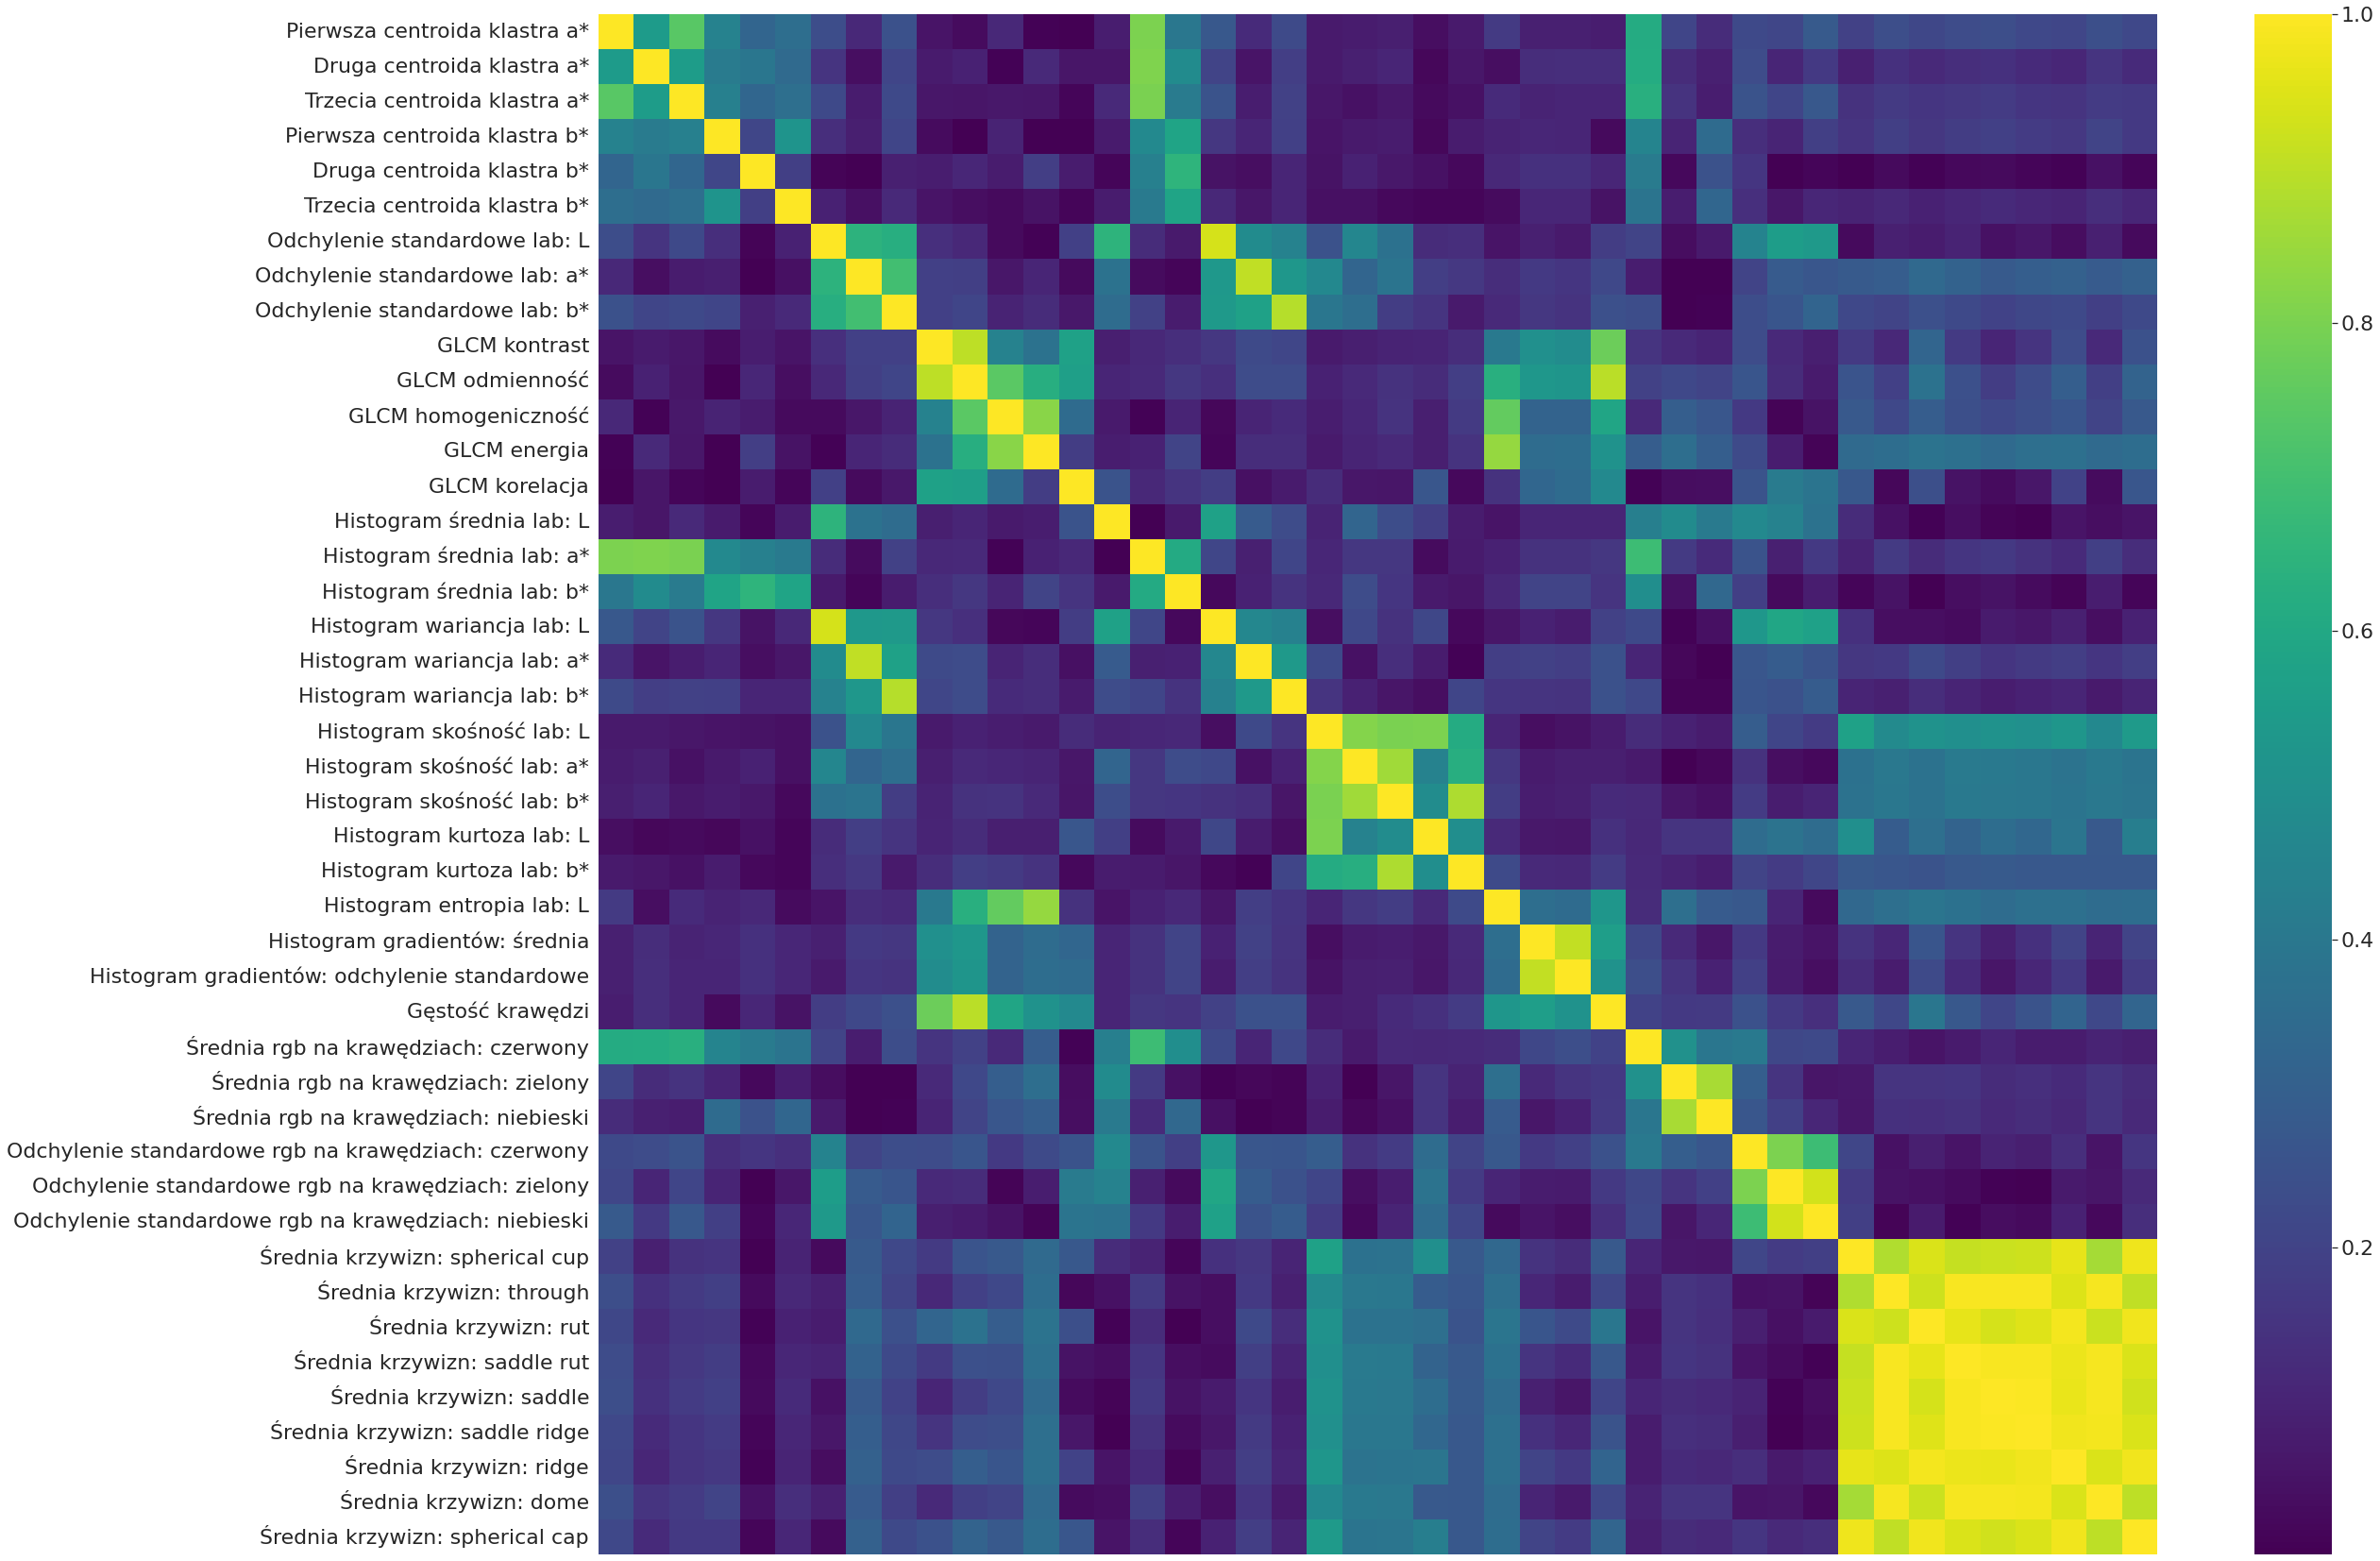

In [8]:
rysuj_m_korelacji(cechy)

<!-- TO TRZEBA JESZCZCE ROZWAŻYĆ -->
<!-- Możemy łatwo zauważyć, że część cech jest ze sobą silnie skorelowana. W celu ograniczenia tego problemu usuniemy częśc cech w taki sposób, aby każdy współczynnik korelacji wynosił co najwyżej 85%. -->

## PODSTAWOWA WIZUALIZACJA <a class="anchor" id="section_3_3"></a>

W celu dobrego zobrazowania charakteru przygotowanych danych zdecydowaliśmy się przedstawić je w formie boxplotu. Do realizacji tego zadania używamy krótkiej funkcji, używającej biblioteki seaborn: 

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
def rysuj_boxplot(dane, tytul, ax=None):
    plt.figure(figsize = (20,20))
    if ax is None:
        axb = sns.boxplot(data=dane, palette="RdPu")
    else:
        axb = sns.boxplot(data=dane, ax=ax, palette="RdPu")
    axb.axes.set_title(tytul, fontsize=30)
    axb.set_xticklabels(axb.get_xticklabels(), rotation=90)
    return ax

Dzięki czemu dane przed poddaniem jakimkolwiek tranformacjom możemy zaprezentować nastepująco:

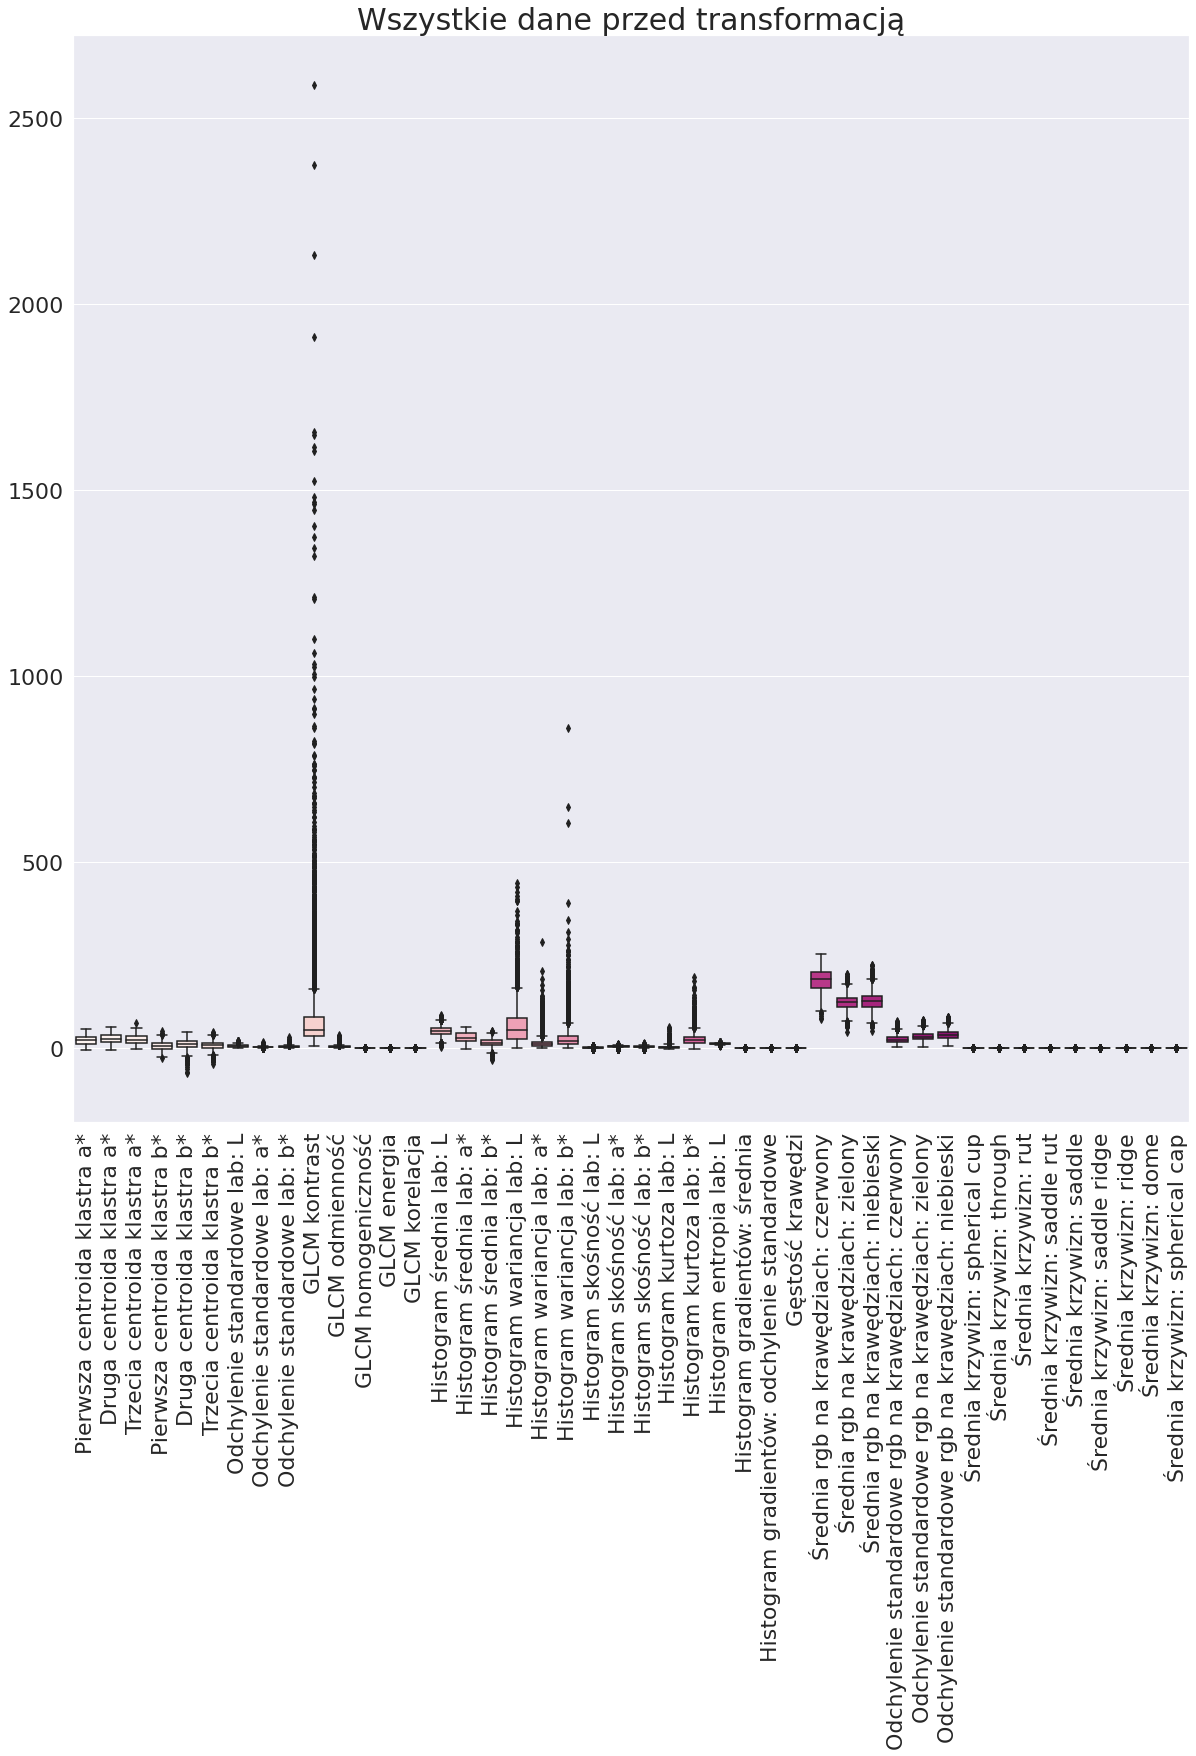

In [11]:
rysuj_boxplot(cechy, "Wszystkie dane przed transformacją")

Jak możemy zauważyć, przez zróżnicowanie zakresu wartości cech, zestawienie wszystkich danych na jednym wykresie nie przedstawia zbyt wielu przydatnych informacji. W celu ułatwienia odczytywania tych wartości, pogrupowaliśmy część cech i stworzyliśmy kilka podwykresów.

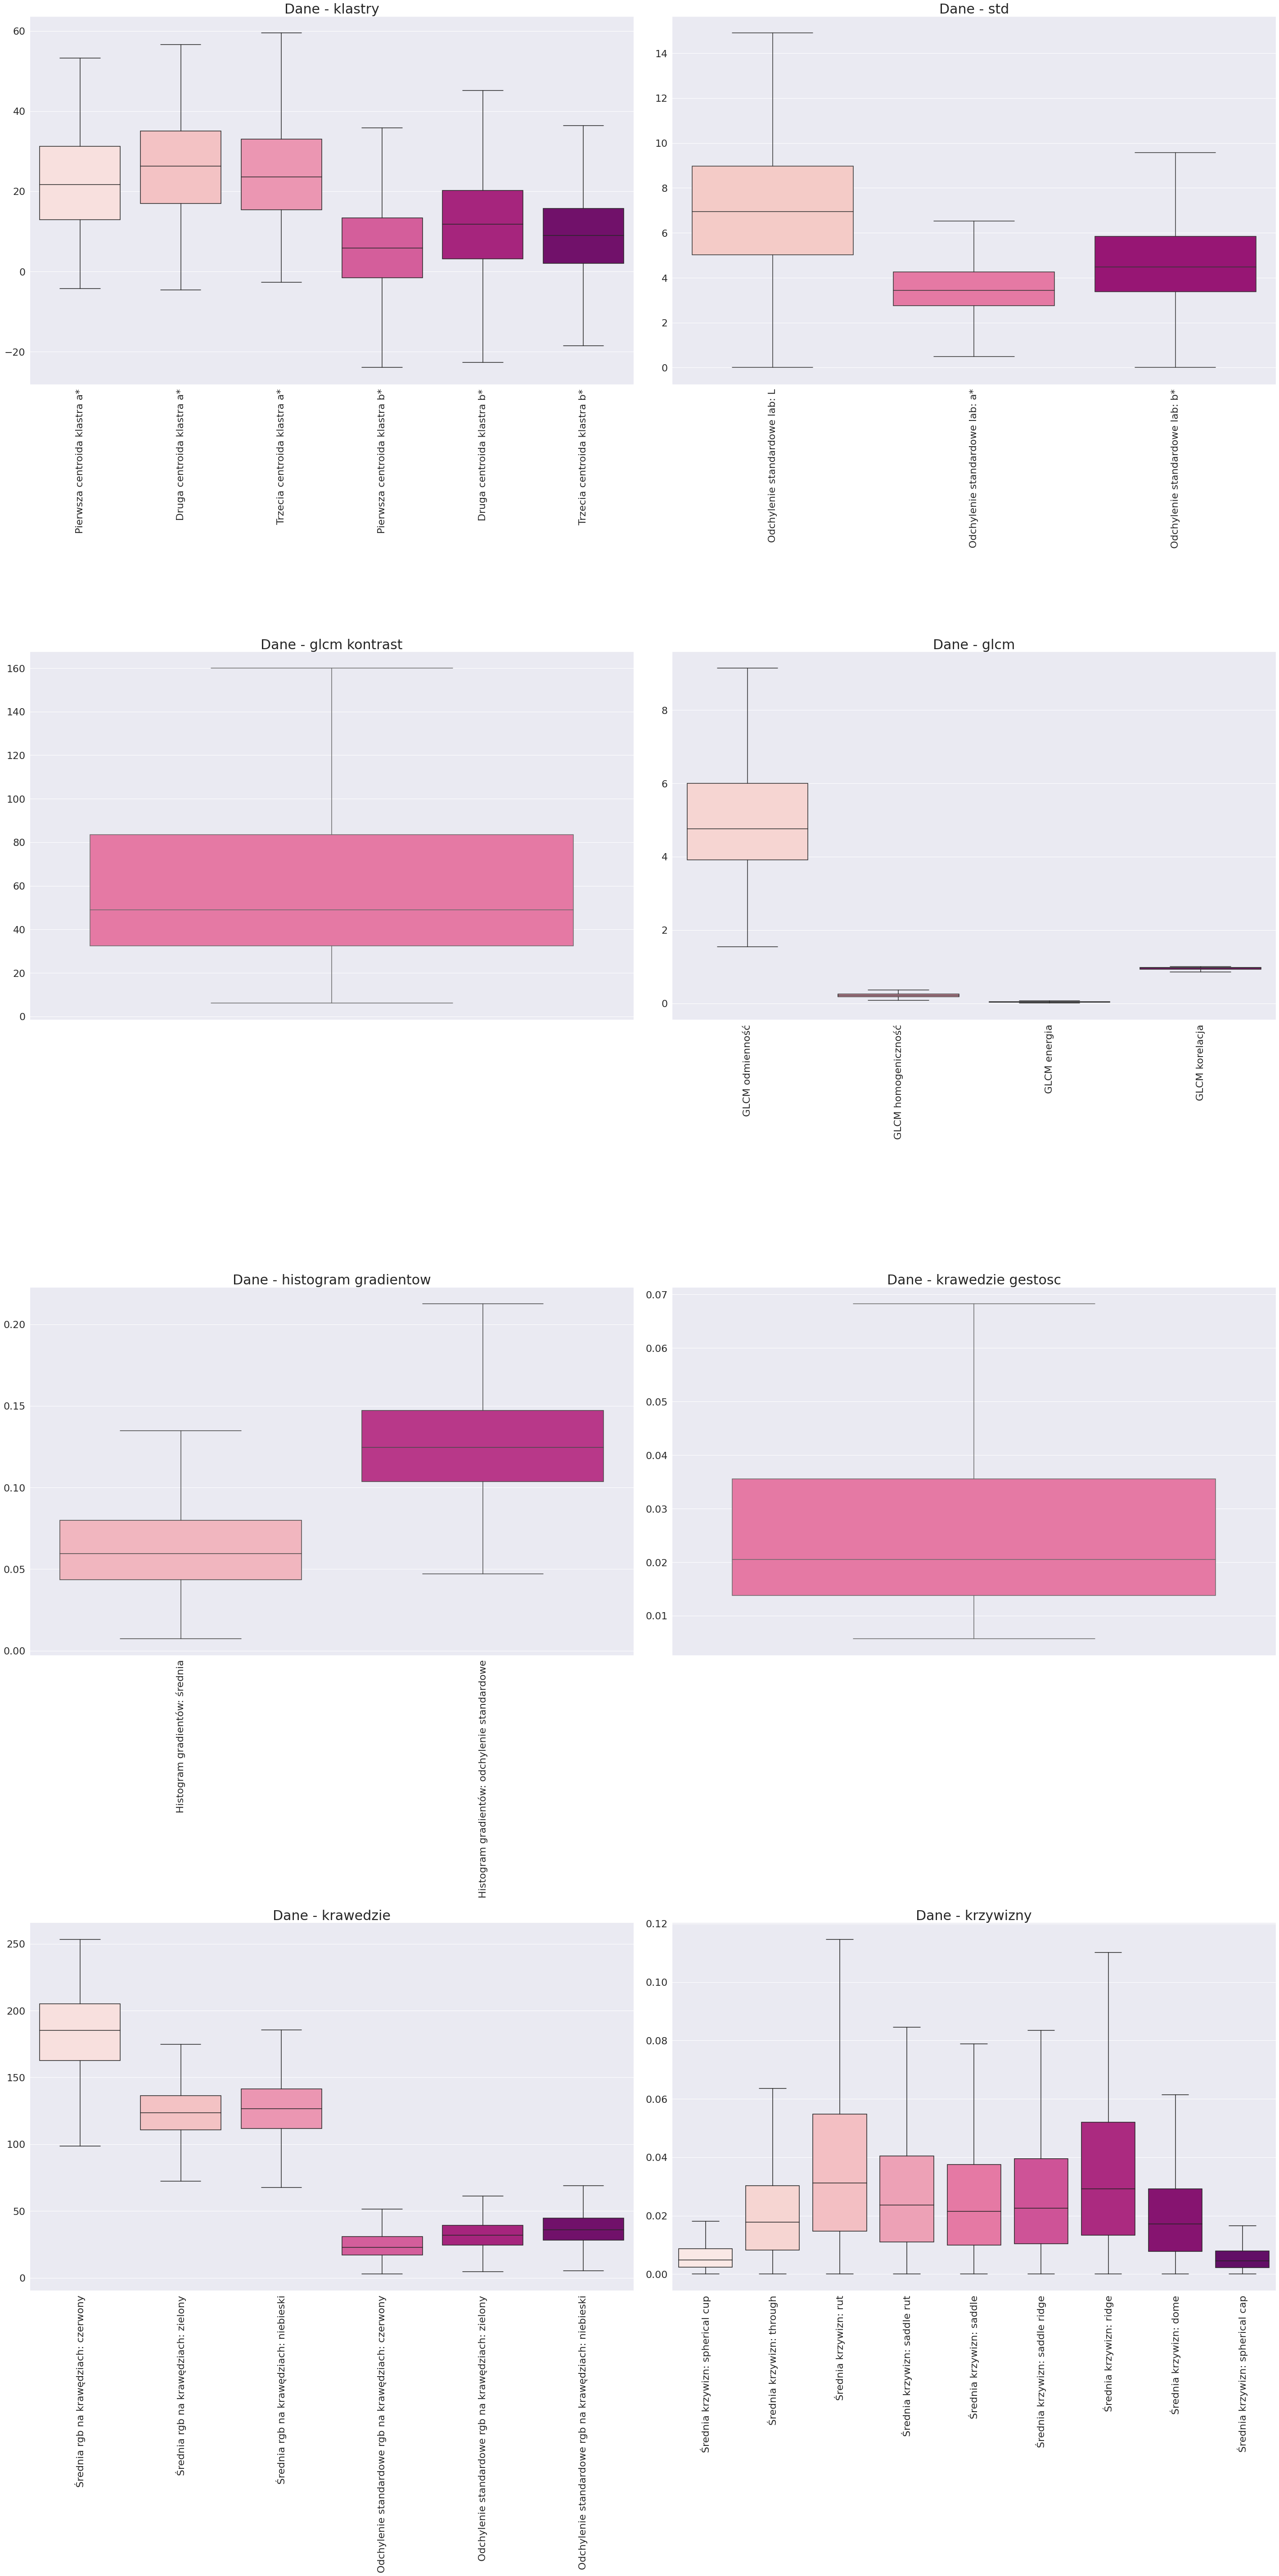

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

In [71]:
cechy_klastry = cechy.iloc[:, :6]
cechy_std_lab = cechy.iloc[:, 6:9]
cechy_glcm_kontrast = cechy.iloc[:, 9]
cechy_glcm = cechy.iloc[:, 10:14]
cechy_histogram = cechy.iloc[:, 14:26]
cechy_histogram_gradientow = cechy.iloc[:, 26:28]
cechy_krawedzie_gestosc = cechy.iloc[:, 28]
cechy_krawedzie = cechy.iloc[:, 29:35]
cechy_krzywizny = cechy.iloc[:, 35:]

# plt.subplots_adjust(bottom=0.2, right=0.8, top=0.9)
fig0, axs = plt.subplots(4, 2, figsize=(40, 80))

plt.tight_layout()  # Ustawia, aby wykresy nie nakładały się na siebie

rysuj_boxplot(cechy_klastry, "Dane - klastry", ax=axs[0][0])
rysuj_boxplot(cechy_std_lab, "Dane - std", ax=axs[0][1])
rysuj_boxplot(cechy_glcm_kontrast, "Dane - glcm kontrast", ax=axs[1][0])
axs[1][0].axes.xaxis.set_visible(False)
rysuj_boxplot(cechy_glcm, "Dane - glcm", ax=axs[1][1])
rysuj_boxplot(cechy_histogram_gradientow, "Dane - histogram gradientow", ax=axs[2][0])
rysuj_boxplot(cechy_krawedzie_gestosc, "Dane - krawedzie gestosc", ax=axs[2][1])
axs[2][1].axes.xaxis.set_visible(False)
rysuj_boxplot(cechy_krawedzie, "Dane - krawedzie", ax=axs[3][0])
rysuj_boxplot(cechy_krzywizny, "Dane - krzywizny", ax=axs[3][1])


plt.show()

## OBSERWACJE ODSTAJĄCE <a class="anchor" id="section_3_4"></a>

Na powyższych boxplotach można łatwo zauważyć, że w naszym zestawie danych istnieje wiele obserwacji odstających. Dane te powinny więc zostać w jakiś sposób obsłużone. Zdecydowaliśmy się, że wartość obserwacji odstającej zastapimy wartościami skrajów wąsów.

In [13]:
def utnij_wasy(wartosc, was_dolny, was_gorny):
    if wartosc < was_dolny: return was_dolny
    if wartosc > was_gorny: return was_gorny
    return wartosc
    
for tytul in wszystkie_dane.columns[1:]:
    wszystkie_dane[tytul] = wszystkie_dane[tytul].apply(lambda x: utnij_wasy(x, statystyki['wąs dolny'][tytul], statystyki['wąs górny'][tytul]))
cechy = wszystkie_dane.drop(['Rak'], axis=1)

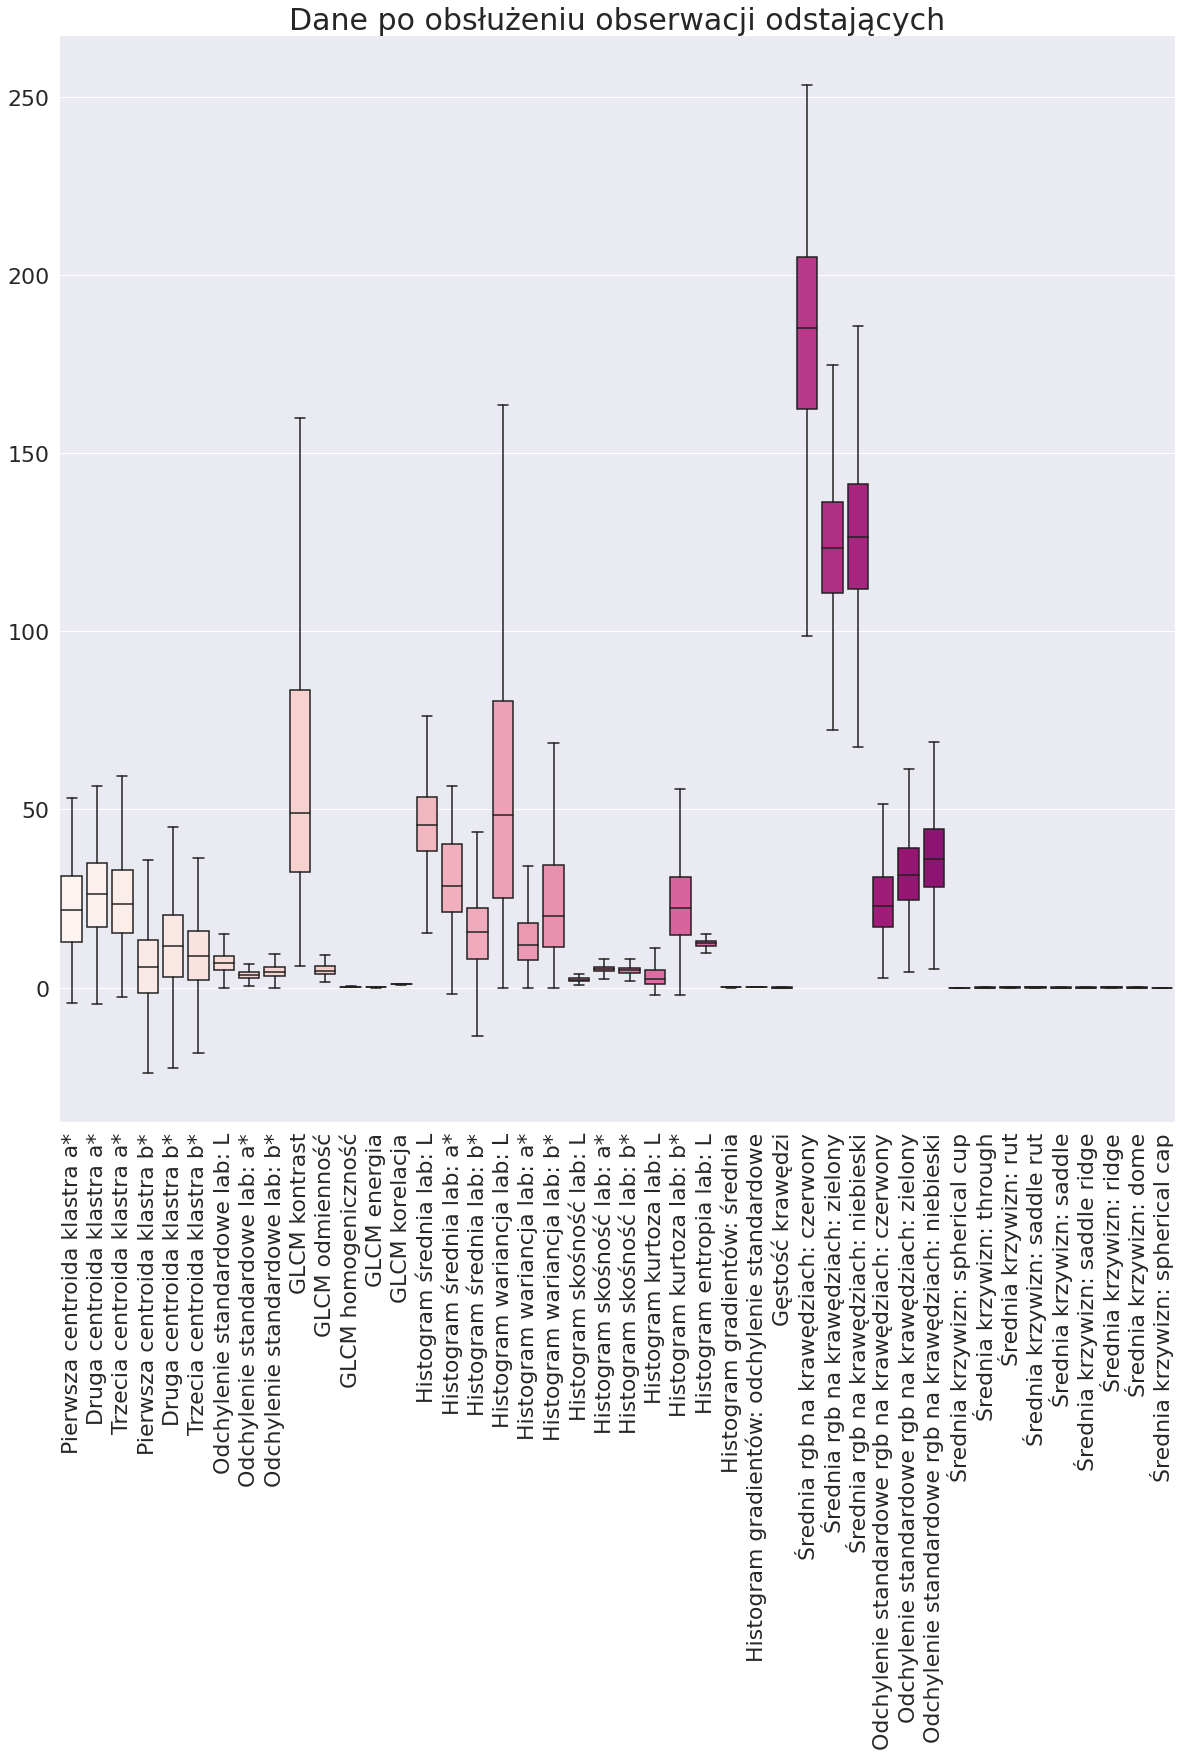

In [14]:
rysuj_boxplot(cechy, "Dane po obsłużeniu obserwacji odstających")

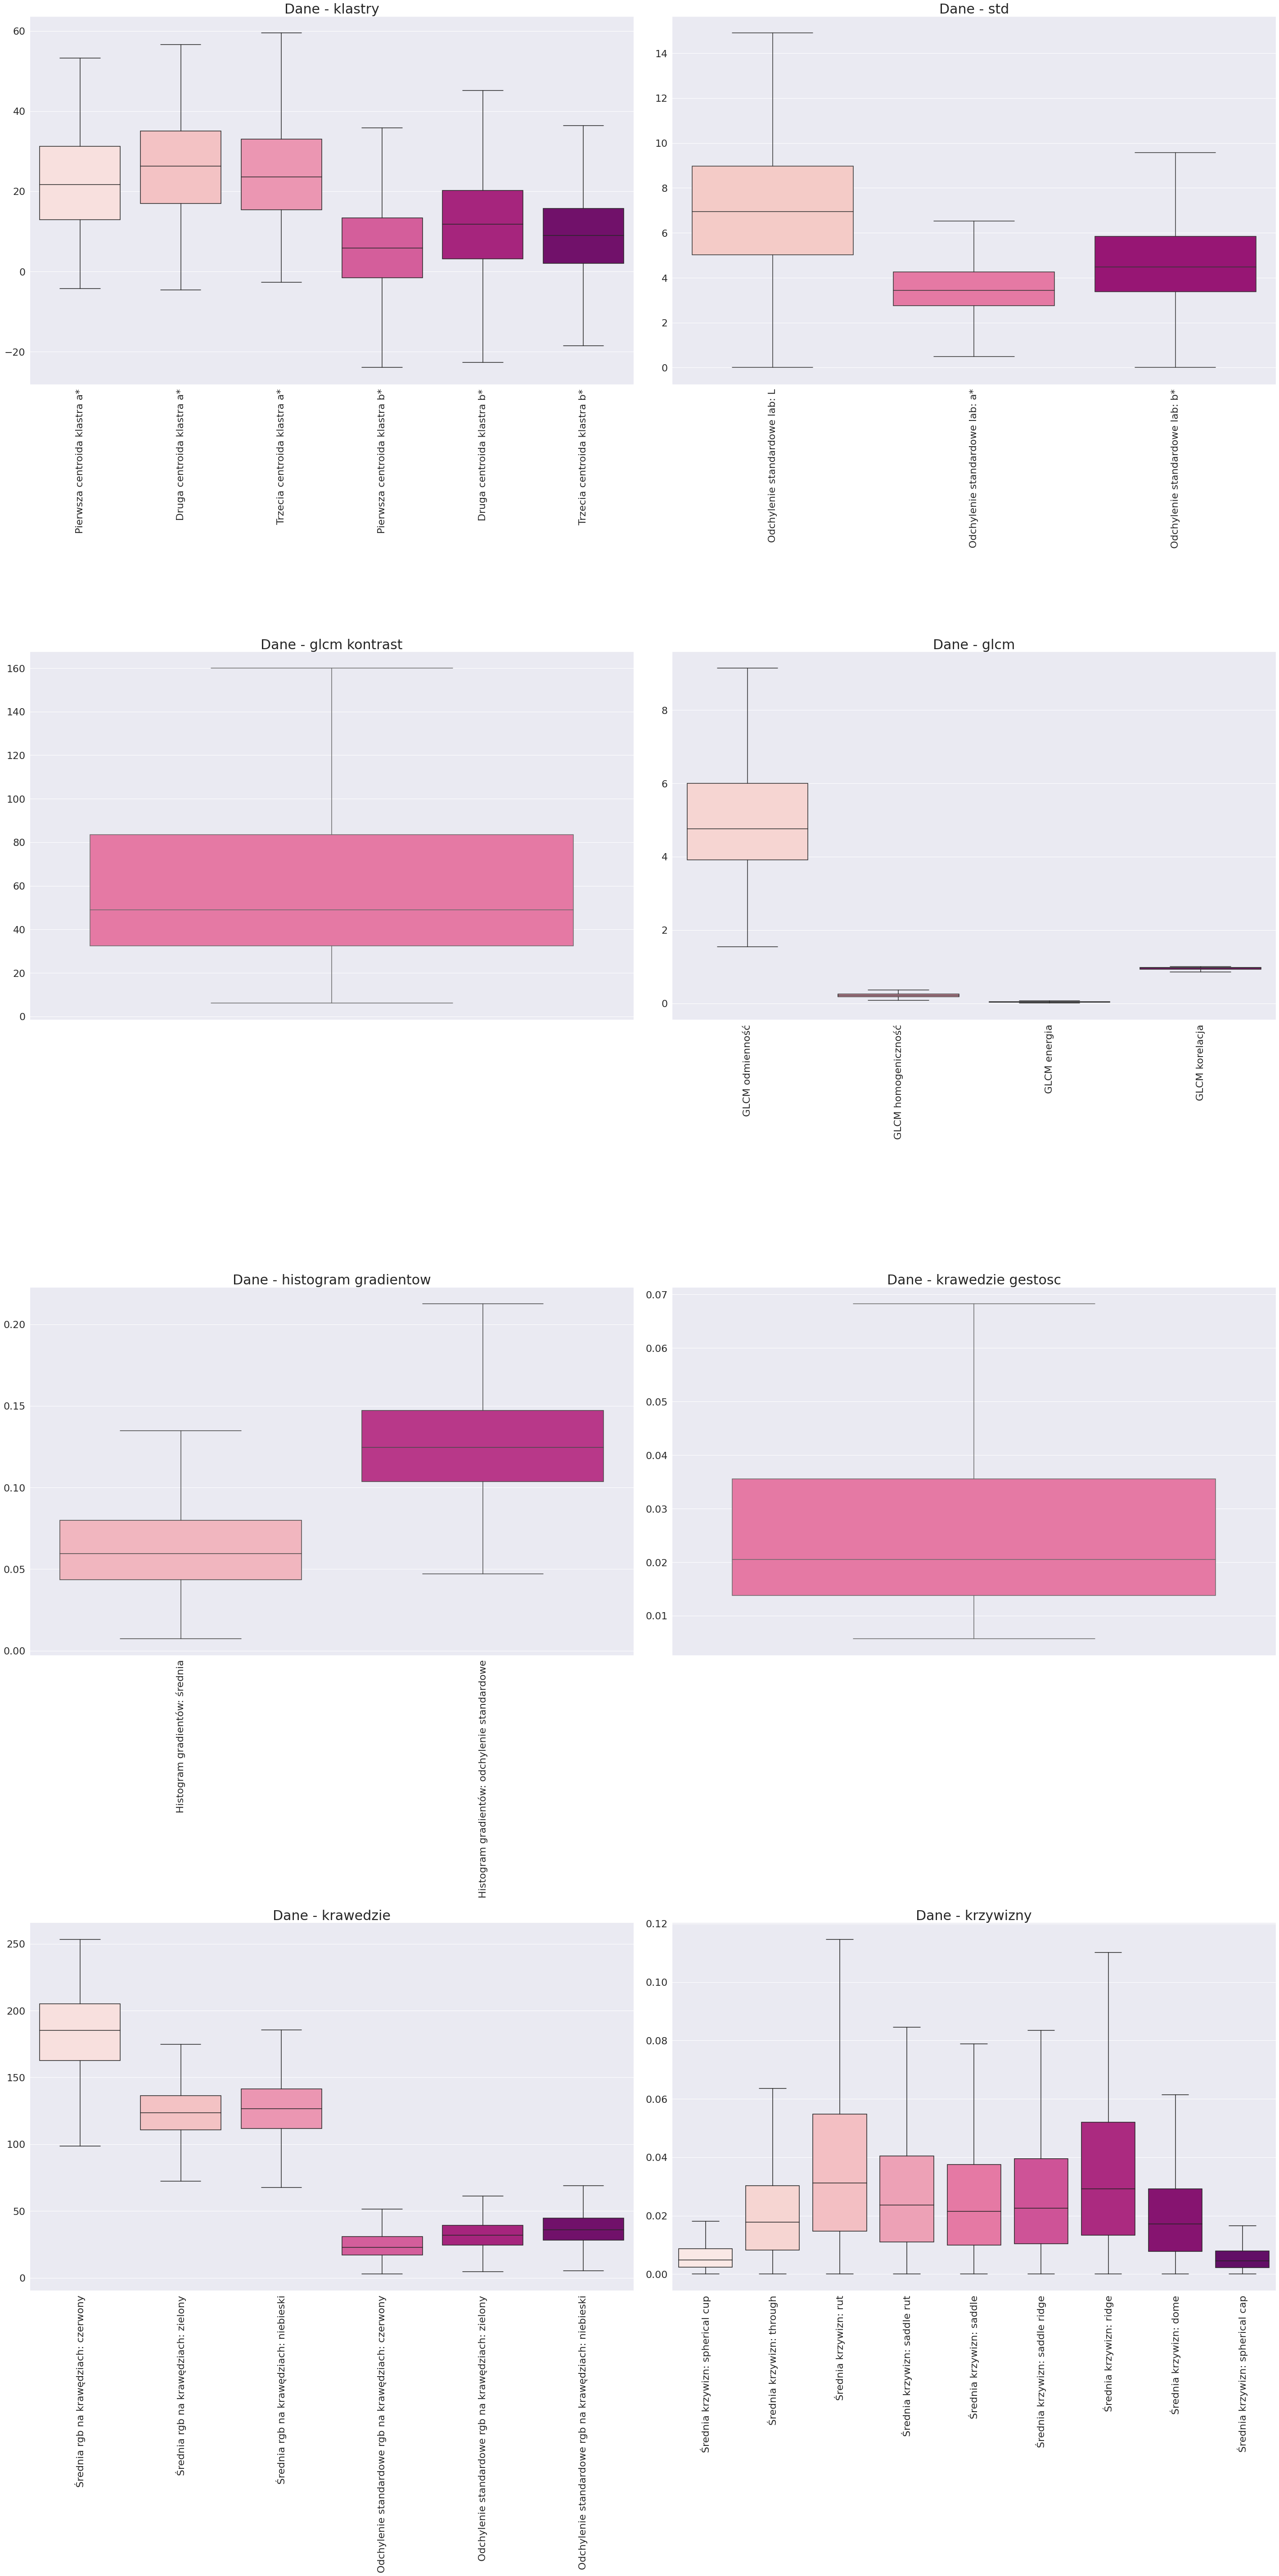

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

In [72]:
cechy_klastry = cechy.iloc[:, :6]
cechy_std_lab = cechy.iloc[:, 6:9]
cechy_glcm_kontrast = cechy.iloc[:, 9]
cechy_glcm = cechy.iloc[:, 10:14]
cechy_histogram = cechy.iloc[:, 14:26]
cechy_histogram_gradientow = cechy.iloc[:, 26:28]
cechy_krawedzie_gestosc = cechy.iloc[:, 28]
cechy_krawedzie = cechy.iloc[:, 29:35]
cechy_krzywizny = cechy.iloc[:, 35:]

# plt.subplots_adjust(bottom=0.2, right=0.8, top=0.9)
fig1, axs = plt.subplots(4, 2, figsize=(40, 80))

rysuj_boxplot(cechy_klastry, "Dane - klastry", ax=axs[0][0])
rysuj_boxplot(cechy_std_lab, "Dane - std", ax=axs[0][1])
rysuj_boxplot(cechy_glcm_kontrast, "Dane - glcm kontrast", ax=axs[1][0])
axs[1][0].axes.xaxis.set_visible(False)
rysuj_boxplot(cechy_glcm, "Dane - glcm", ax=axs[1][1])
rysuj_boxplot(cechy_histogram_gradientow, "Dane - histogram gradientow", ax=axs[2][0])
rysuj_boxplot(cechy_krawedzie_gestosc, "Dane - krawedzie gestosc", ax=axs[2][1])
axs[2][1].axes.xaxis.set_visible(False)
rysuj_boxplot(cechy_krawedzie, "Dane - krawedzie", ax=axs[3][0])
rysuj_boxplot(cechy_krzywizny, "Dane - krzywizny", ax=axs[3][1])
plt.show()

## TRANSFORMACJE DANYCH <a class="anchor" id="section_3_5"></a>

Ponieważ zróżnicowanie w wartościach danych jest bardzo duże, ale i również dlatego, że dane te w niezmienionej postaci okazują się mało użyteczne w przypadku niektórych z później użytych metod, niezbędna będzie ich tranformacja.
Metody które zastosowaliśmy to:
- logarytmowanie
- unitaryzacja
- standaryzacja

### Logarytmowanie <a class="anchor" id="section_3_5_1"></a>

Pomimo że nie jest ono użyteczne dla zastosowanych przez nas metod, ułatwia ono wizualiacje, bez stosowania dużej skali, stosunków między różnymi wartościami, jednoczesnie redukując ich skośności.

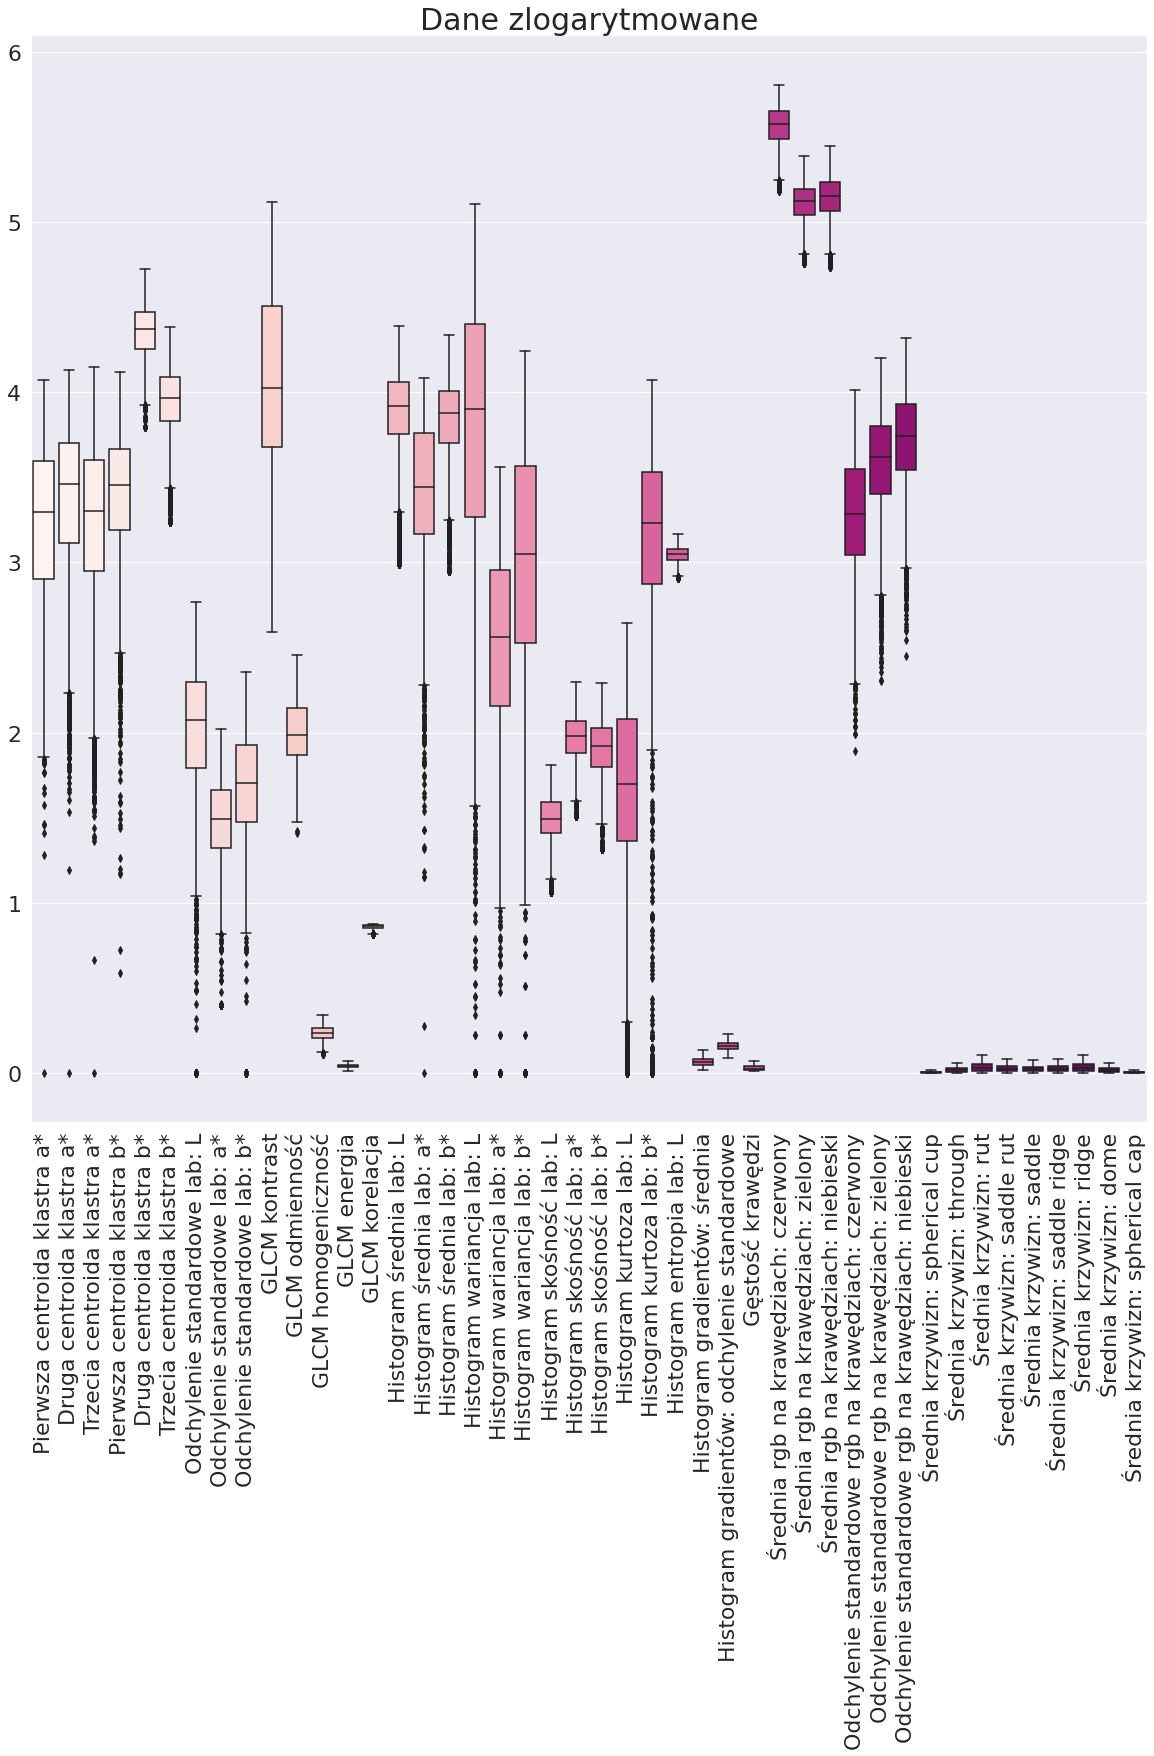

In [16]:
from math import log

dane_zlogarytmowane = cechy.copy()

for tytul in wszystkie_dane.columns[1:]:
    dane_zlogarytmowane[tytul] = dane_zlogarytmowane[tytul].apply(lambda x: log(x + abs(statystyki['minimum'][tytul])+1))

rysuj_boxplot(dane_zlogarytmowane, "Dane zlogarytmowane")

### Unitaryzacja <a class="anchor" id="section_3_5_3"></a>

Wszystkie dane przedstawione są w skali <0,1>. Umożliwia odczytanie charakteru średnich i wariancji naszych danych.
Dla modelu SVM lepsza jest standaryzacja, dlatego wykorzystamy właśnie ją.

In [17]:
from sklearn.preprocessing import MinMaxScaler
mns = MinMaxScaler()
mns.fit(cechy)
dane_data_normalizacja = mns.fit_transform(cechy)

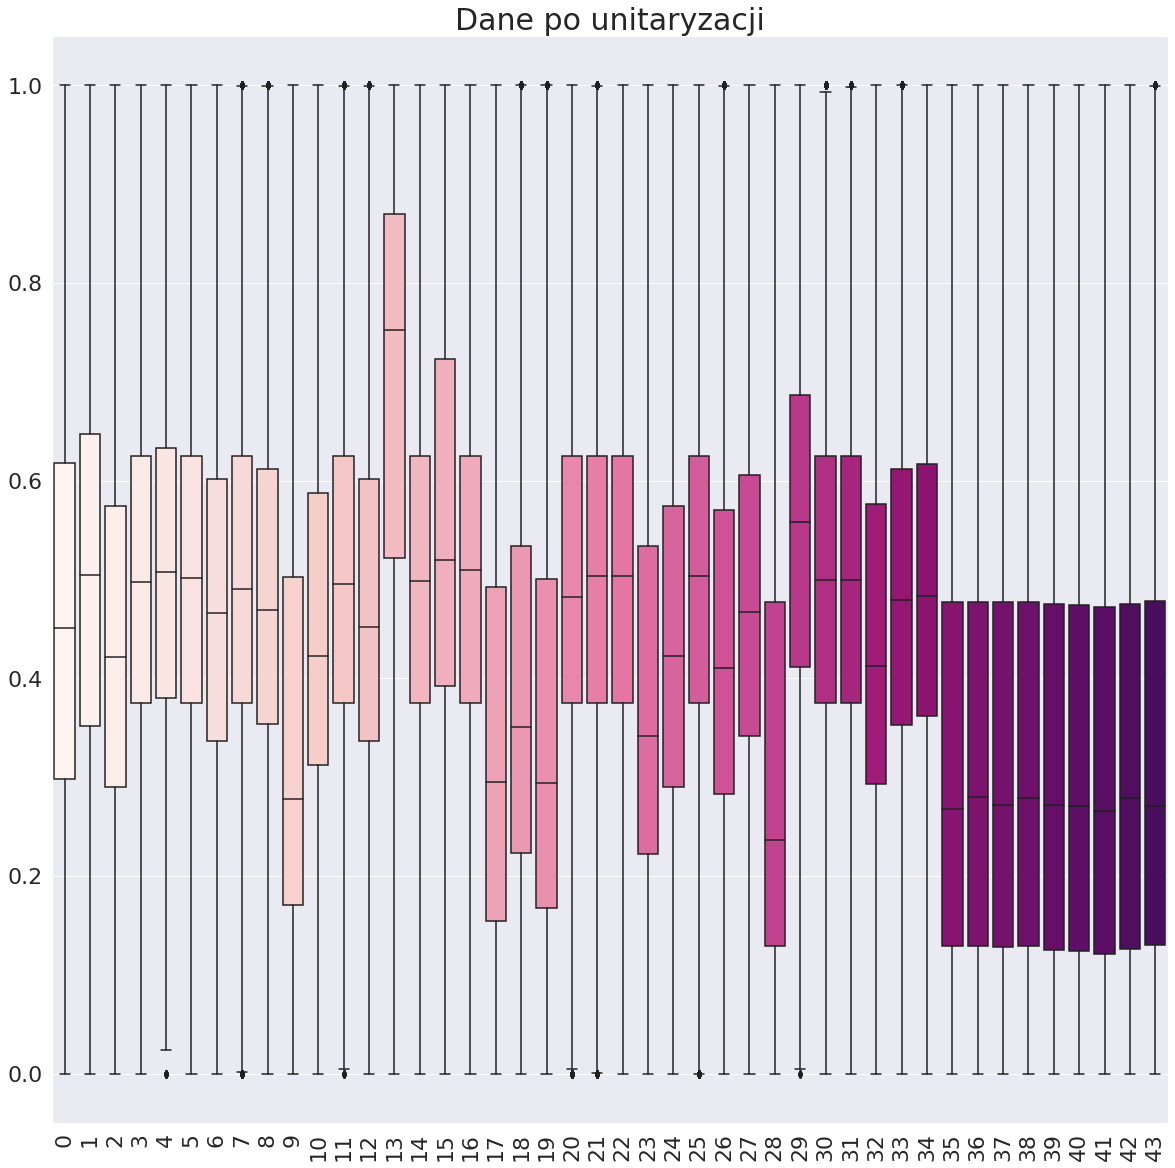

In [18]:
rysuj_boxplot(dane_data_normalizacja, "Dane po unitaryzacji")

### Standaryzacja <a class="anchor" id="section_3_5_2"></a>

Po standaryzacji średnia danych ustawiana jest na w punkcie 0, a znak nowych wartości decyduje o tym czy znajduje się ona poniżej (dodatni) lub poniżej (ujemny) średniej.

In [19]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(cechy)
dane_data_standaryzacja = sc.fit_transform(cechy)

<Figure size 1440x576 with 0 Axes>

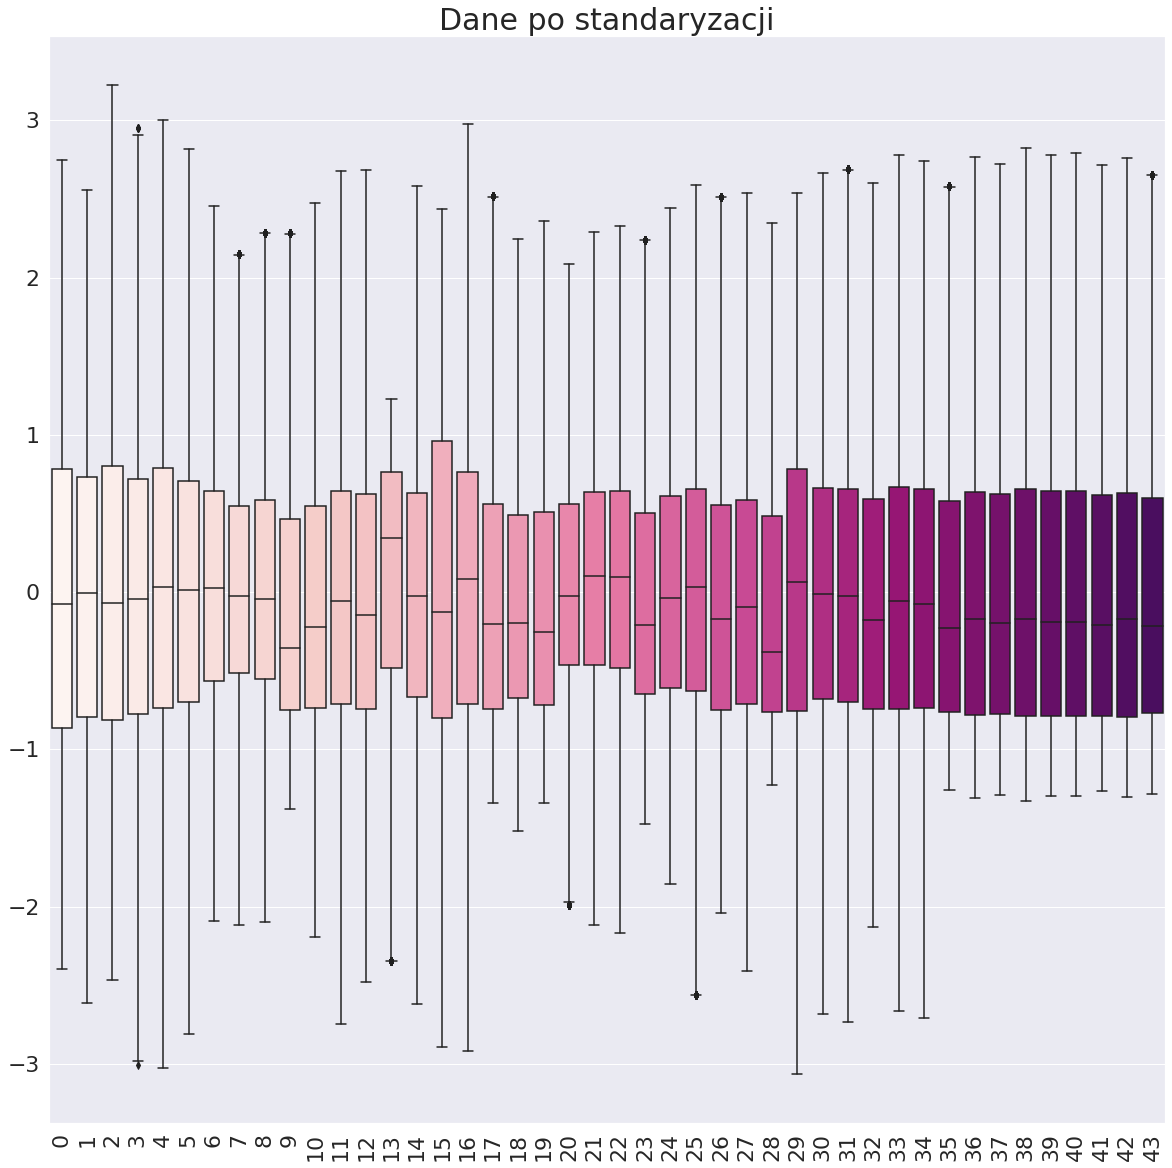

In [20]:
plt.figure(figsize = (20,8))
rysuj_boxplot(dane_data_standaryzacja, "Dane po standaryzacji")

## BRAKI DANYCH <a class="anchor" id="section_3_6"></a>
Obsługa brakujących danych nie była potrzebna, ponieważ braki w użytych danych nie wystąpiły.

# KLASYFIKACJA: <a class="anchor" id="chapter4"></a>

W celu stwierdzenia czy dane zdjęcie przedstawia nowotworową zmianę skórną, zastosujemy 5 algorytmów klasyfikacyjnych oraz oparty na nich model hybrydowy. Algorytmy jako dane trenujące otrzymały zbiór wartości ponad 40 cech otrzymanych z analizy prawie 10 tys. zdjęć zaczerpniętych z bazy Harvardu ze zdjęciami przedstawiąjących różne zmiany skórne. Wykorzystaliśmy część tej bazy, przedstawiącą zdjęcia niegroźnych zmian skórnych, jak również zmian nowotworowych.

Używając przygotowanych danych wykorzystamy 5 modeli klasyfikacji oraz oparty na nich model hybrydowy. Zastosowane modele to:
- SVM
- LAS LOSOWY
- REGRESJA LOGISTYCZNA
- KNN
- NAIWNY BAYES
- Model hybrydowy oparty o powyższe

W celu zrealizowania tego zadania nasz zestaw podzieliliśmy na zbiór uczący i testowy.

In [21]:
from sklearn.metrics import accuracy_score
dane_labels = wszystkie_dane['Rak']
dane_data = wszystkie_dane.drop(['Rak'], axis=1)

In [22]:
# Utworzenie zestawów danych treningowych i uczących
from sklearn.model_selection import train_test_split
x_uczacy, x_testujacy, y_uczacy, y_testujacy = train_test_split(dane_data,dane_labels,test_size=0.2)

In [23]:
# Standaryzacja danych wejściowych
from sklearn.preprocessing import StandardScaler
sc1 = StandardScaler()
sc1.fit(x_uczacy)
x_uczacy_standaryzacja = sc1.transform(x_uczacy)
x_testujacy_standaryzacja = sc1.transform(x_testujacy)

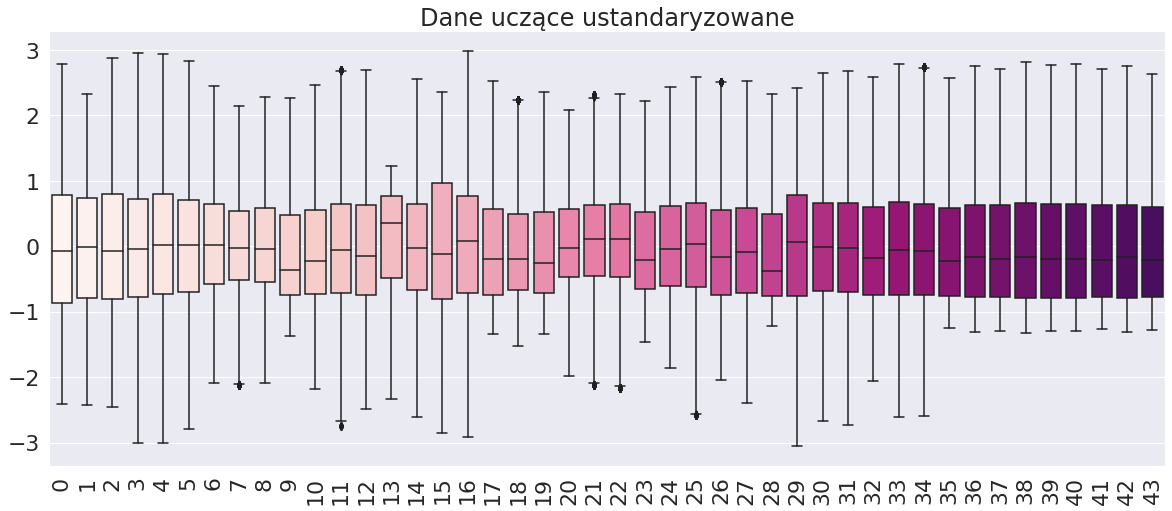

In [24]:
plt.figure(figsize = (20,8))
ax = sns.boxplot(data=x_uczacy_standaryzacja, palette="RdPu")
ax.set(title='Dane uczące ustandaryzowane')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

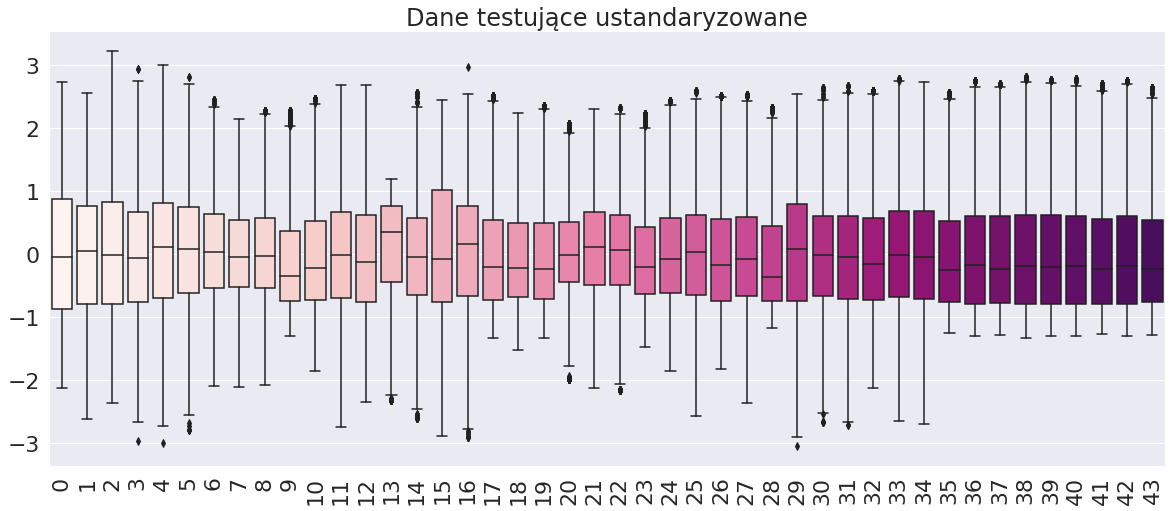

In [25]:
plt.figure(figsize = (20,8))
ax = sns.boxplot(data=x_testujacy_standaryzacja, palette="RdPu")
ax.set(title='Dane testujące ustandaryzowane')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

## METODA: SVM <a class="anchor" id="section_4_1"></a>

Sieci wektorów nośnych (SVM) są dobrze znanymi technikami uczenia z nauczycielem opartymi na teorii metod statystycznych, które są często wykorzystywane w zadaniach predykcji i klasyfikacji. W przypadku poprawnego procesu uczenia, sieci SVM cechuje bardzo duża dokładność i dobre właściwości generalizacyjne.

In [26]:
#METODA SVM
from sklearn.svm import SVC

Model ten wymaga określenia wartości stałej C, będącej marginesem. Sprawdzamy więc jaka wartość tej stałej będzie najbardziej optymalna dla naszego zestawu danych:

In [27]:
wyniki_accuracy_svm = []
zakres = list(range(1,20))
najlepsze_c = 1
najlepsze_acc = 0

for k in zakres:
    model_SVM = SVC(C=k)
    model_SVM.fit(x_uczacy_standaryzacja, y_uczacy)
    
    y_przewidziane_SVM = model_SVM.predict(x_testujacy_standaryzacja)
    acc_aktualne = accuracy_score(y_testujacy, y_przewidziane_SVM)
    wyniki_accuracy_svm.append(acc_aktualne)
    
    if(acc_aktualne > najlepsze_acc):
        najlepsze_acc = acc_aktualne
        najlepsze_c = k

Wynik naszej analizy możemy przedstawić w postaci wykresu, z którego możemy odczytać optymalne k, jak i najwyższe osiągnięcie accuracy dla tej liczby.

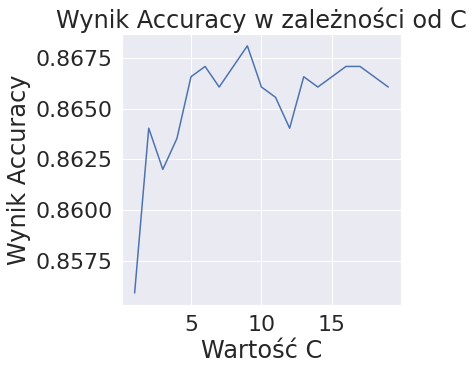

In [28]:
plt.figure(figsize=(5,5))
plt.plot(zakres, wyniki_accuracy_svm)
plt.xlabel("Wartość C")
plt.ylabel("Wynik Accuracy")
plt.title("Wynik Accuracy w zależności od C")
plt.show()

In [29]:
print("Najlepsze C:", najlepsze_c, "\nNajlepsze Accuracy:", najlepsze_acc)

Najlepsze C: 9 
Najlepsze Accuracy: 0.8680872653475393


Na podstawie optymalnej wartości C, budujemy model w następujący sposób:

In [30]:
model_SVM = SVC(C=najlepsze_c)
model_SVM.fit(x_uczacy_standaryzacja, y_uczacy)

y_przewidziane_SVM = model_SVM.predict(x_testujacy_standaryzacja)
acc_SVM = accuracy_score(y_testujacy, y_przewidziane_SVM)

## METODA: LAS LOSOWY <a class="anchor" id="section_4_2"></a>

Las losowy to zbiór klasyfikatorów, w którym każdy pojedynczy klasyfikator jest drzewem decyzyjnym uczonym bez zatrzymywania. Każdy klasyfikator wchodzący w skład lasu losowego jest uczony na specjalnie wylosowanej dla niego próbce danych D, która powstaje przez wylosowanie n razy ze zwracaniem ze wszystkich N próbek uczących.

W przypadku modelów lasów losowych używamy estymatorów, które określają liczbę drzew danego lasu. W celu wybrania najlepszego estymatora dla naszego zbioru danych uruchamiamy algorytm dla kolejnych jego liczności. Następnie wybieramy jedną z nich przyglądając się sporządzonemu wykresowi, z którego możemy wyczytać w którym momencie wzrost Accuracy staje się zbyt mały aby uzasadnić zwiększanie estymatora.

In [31]:
#METODA LAS LOSOWY
from sklearn.ensemble import RandomForestClassifier

In [32]:
dokladnosci = []

max_index = 0
max_dokladnosc = 0

for i in range(1, 200):
    model_las_losowy = RandomForestClassifier(n_estimators = i)
    model_las_losowy.fit(x_uczacy_standaryzacja, y_uczacy)
    
    y_przewidziane_las = model_las_losowy.predict(x_testujacy_standaryzacja)
    dokladnosc = accuracy_score(y_testujacy, y_przewidziane_las)
    dokladnosci.append(dokladnosc)
    
    if dokladnosc > max_dokladnosc:
        max_dokladnosc = dokladnosc
        max_index = i

Text(0.5, 1.0, 'Dokładności dla kolejnych liczb estymatorów')

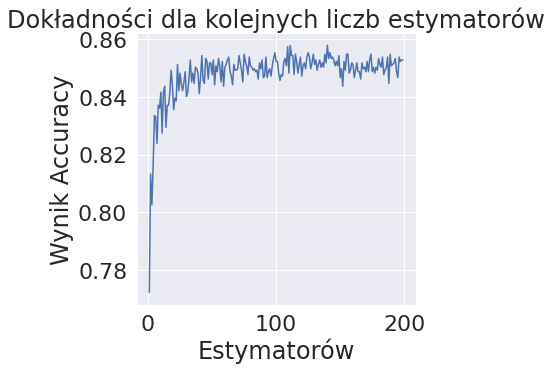

In [33]:
plt.figure(figsize=(5,5))
plt.plot(range(1, 200), dokladnosci)
plt.xlabel('Estymatorów')
plt.ylabel('Wynik Accuracy')
plt.title('Dokładności dla kolejnych liczb estymatorów')

In [34]:
print(f'Najlepsza dokładność wyszła dla {max_index} estymatorów i wyniosła {max_dokladnosc}')

Najlepsza dokładność wyszła dla 111 estymatorów i wyniosła 0.8579401319127347


Na podstawie najlepszego estymatora przedstawionego jako zmienna max_index, budujemy model w następujący sposób:

In [35]:
model_las_losowy = RandomForestClassifier(n_estimators = max_index, random_state = 100)
model_las_losowy.fit(x_uczacy_standaryzacja, y_uczacy)

y_przewidziane_las = model_las_losowy.predict(x_testujacy_standaryzacja)
acc_las = accuracy_score(y_testujacy, y_przewidziane_las)

## METODA: REGRESJA LOGISTYCZNA <a class="anchor" id="section_4_3"></a>

Jedna z metod regresji używanych w statystyce w przypadku, gdy zmienna zależna jest na skali dychotomicznej (przyjmuje tylko dwie wartości). Zwykle wartości zmiennej objaśnianej wskazują na wystąpienie lub brak wystąpienia pewnego zdarzenia.
<br>Model oparty o regresje logistyczną zbudujemy następująco:

In [36]:
#METODA REGRESJA LOGISTYCZNA
from sklearn.linear_model import LogisticRegression

In [37]:
model_Liniowy = LogisticRegression(max_iter = 1000)
model_Liniowy.fit(x_uczacy_standaryzacja, y_uczacy)

y_przewidziane_regresja = model_Liniowy.predict(x_testujacy_standaryzacja)

Accuracy regresji logistycznej możemy wyznaczyc przy pomocy funkcji:

In [38]:
acc_regresja = accuracy_score(y_testujacy, y_przewidziane_regresja)
print(f"Accuracy regresji logistycznej: {acc_regresja}")

Accuracy regresji logistycznej: 0.8259766615930999


## METODA: KNN <a class="anchor" id="section_4_4"></a>

Metoda zakładająca, że dane należące do tej samej klasy mają podobne wartości cech oraz są położone stosunkowo blisko w przestrzeni. Algorytm kNN zakłada interpretację graficzną procesu klasyfikacji. Istotne jest zdefiniowanie pojęcia odległości, posługując się odpowiednią metryką.

Model ten wymaga określenia ilości sąsiadów, będących sąsiednimi wartościami cech. Sprawdzamy więc najpierw jaka ilość sąsiadów będzie najbardziej optymalna dla naszych danych przy użyciu tego modelu.

In [39]:
#METODA KNN
from sklearn.neighbors import KNeighborsClassifier

In [40]:
wyniki_accuracy_knn = []
zakres = list(range(1,80))
najlepsze_k = 1
najlepsze_acc = 0

for k in zakres:
    model_KNN = KNeighborsClassifier(n_neighbors=k)
    model_KNN.fit(x_uczacy_standaryzacja, y_uczacy)
    
    y_przewidziane_knn = model_KNN.predict(x_testujacy_standaryzacja)
    acc_aktualne = accuracy_score(y_testujacy, y_przewidziane_knn)
    wyniki_accuracy_knn.append(acc_aktualne)
    
    if(acc_aktualne > najlepsze_acc):
        najlepsze_acc = acc_aktualne
        najlepsze_k = k

Wynik naszej analizy możemy przedstawić w postaci wykresu, z którego możemy odczytać optymalne k, jak i najwyższe osiągnięcie accuracy dla tej liczby.

Text(0.5, 1.0, 'Wynik Accuracy w zależności od ilości sąsiadów')

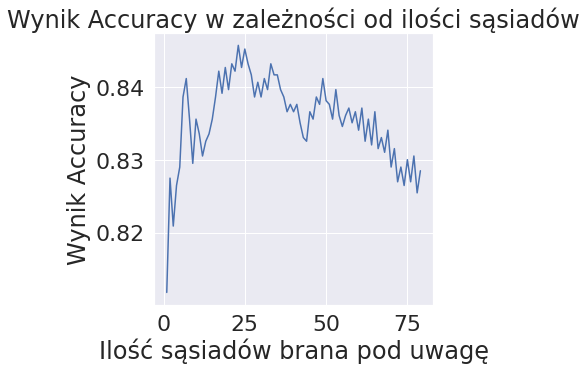

In [41]:
#wykres
plt.figure(figsize=(5,5))
plt.plot(zakres,wyniki_accuracy_knn)
plt.xlabel("Ilość sąsiadów brana pod uwagę")
plt.ylabel("Wynik Accuracy")
plt.title("Wynik Accuracy w zależności od ilości sąsiadów")

In [42]:
print("Najlepsze k:", najlepsze_k, "\nNajlepsze accuracy:", najlepsze_acc)

Najlepsze k: 23 
Najlepsze accuracy: 0.8457635717909691


Na podstawie najlepszej liczby sąsiadów przedstawionej jako zmienna najlepsze_k, budujemy model w następujący sposób:

In [43]:
model_KNN = KNeighborsClassifier(n_neighbors=najlepsze_k)
model_KNN.fit(x_uczacy_standaryzacja, y_uczacy)

y_przewidziane_SVM = model_SVM.predict(x_testujacy_standaryzacja)
acc_KNN = accuracy_score(y_testujacy, y_przewidziane_SVM)

## METODA: NAIWNY BAYES <a class="anchor" id="section_4_5"></a>

Jest to jeden z najprostszych przykładów klasyfikacji opierający się na prostym probabilistycznym modelu. Uogólniając, metoda ta polega na obliczeniu dla każdej obserwacji prawdopodobieństwa jej przynależności do konkretnej klasy. Następnie obserwację przypisuje się do tej klasy, gdzie prawdopodobieństwo jest najwyższe. Metoda ta działa najlepiej, gdy dane nie są ze sobą mocno skorelowane. (W naszym przypadku wiele z danych jest skorelowanych, dlatego to jedna z mniej dokładnych metod w naszym zestawieniu)

In [44]:
#METODA NAIWNY BAYES
from sklearn.naive_bayes import GaussianNB

In [45]:
model_bayes = GaussianNB()
model_bayes.fit(x_uczacy_standaryzacja, y_uczacy)

y_przewidziane_bayes = model_bayes.predict(x_testujacy_standaryzacja)
acc_bayes = accuracy_score(y_testujacy, y_przewidziane_bayes)

## METODA: HYBRYDOWA <a class="anchor" id="section_4_6"></a>

W modelu hybrydowym wykorzystujemy wszystkie wspomiane metody. Model hybrydowy bazuje w naszym przypadku na "głosowaniu", czyli wybieramy tę klasę ('Rak' lub 'brak raka'), którą wskaże więcej modeli. Z tego względu wykorzystujemy nieparzystą liczbę modeli, aby uniknąć sytuacji, gdy jest tyle samo "głosów" na obie klasy.

In [46]:
dataframe_przewidzianych = pd.DataFrame(
                                        list(zip(
                                            y_przewidziane_SVM,
                                            y_przewidziane_las, 
                                            y_przewidziane_knn, 
                                            y_przewidziane_regresja,
                                            y_przewidziane_bayes)),
                                        columns = ['SVM','Las losowy','KNN', 'Regresja', 'Bayes']
                                       )
wynik_hybrydowy = dataframe_przewidzianych.mode(axis=1)
wynik_hybrydowy.columns=['Przewidziane']

acc_Hybrydowy = accuracy_score(y_testujacy, wynik_hybrydowy['Przewidziane'])
print("ACCURACY modelu hybrydowego:", acc_Hybrydowy)

ACCURACY modelu hybrydowego: 0.8538812785388128


# REZULTATY: <a class="anchor" id="chapter5"></a>

## MIERNIKI <a class="anchor" id="section_5_1"></a>

Miernikiem którego używamy jest wskaźnik Accuracy, który obliczony został dla każdej z wyżej opisanych metod przy użyciu odpowiednich funkcji. Dane te możemy zebrać następująco:

In [47]:
mierniki = pd.DataFrame(
    [acc_SVM, acc_las, acc_regresja, acc_KNN, acc_bayes, acc_Hybrydowy],
    index = ['SVM','Las losowy','Regresja','KNN','Bayes','Hybrydowy'],
    columns = ['Accuracy']
)
mierniki

,Accuracy
SVM,0.868087
Las losowy,0.852867
Regresja,0.825977
KNN,0.868087
Bayes,0.743785
Hybrydowy,0.853881


## WALIDACJA WYKORZYSTANYCH METOD <a class="anchor" id="section_5_2"></a>

Wybranym sposobem walidacji została walidacja krzyżowa, a konketnie k-fold cross-validation method, z uwagi na duży rozmiar zbioru danych.<br>
Wybraną wartością k, oznaczającą na ile grup zostanie podzielony nasz zestaw danych została liczba 10.<br>
Walidacja polega na podziale zestawu danych na daną liczbę grup, a następnie sprawdzenie dokładności metod poprzez wykorzystanie jednej z grup jako testowej i reszty jako trenującej. <br>

Do walidacji została wykorzystana metoda cross_val_score, której przekazujemy klasyfikator, dane (wartości cech i zaklasyfikowanie zdjęć) i liczbę podzbiorów.<br>
Zwraca ona wektor wyników Total Accuracy dla wykorzystania kolejnych podzbiorów zbioru danych jako uczący i testowy.<br>
Ponadto poza walidacją krzyżową i Total Accuracy zostały utworzone macierze pomyłek danych metod, na podstawie których wyliczone zostały: czułość, precyzja i F1-score.

In [48]:
from sklearn.model_selection import cross_val_score

### Walidacja SVM <a class="anchor" id="section_5_2_1"></a>

In [49]:
klasyfikator_svm = SVC(C=najlepsze_c)
wyniki_svm = cross_val_score(klasyfikator_svm, dane_data_standaryzacja, dane_labels, cv=10)

print(f'Dokładności poszczególnych prób: {wyniki_svm}\n')
print(f'Średnia dokładność: {wyniki_svm.mean()} \nze standardowym odchyleniem: {wyniki_svm.std()}')

Dokładności poszczególnych prób: [0.86105477 0.87728195 0.87423935 0.86700508 0.84974619 0.85177665
 0.84873096 0.85380711 0.87005076 0.86395939]

Średnia dokładność: 0.8617652207040702 
ze standardowym odchyleniem: 0.009875475280220316


### Walidacja Lasu losowego <a class="anchor" id="section_5_2_2"></a>

In [50]:
klasyfikator_rf = RandomForestClassifier(n_estimators=max_index, random_state=100)
wyniki_rf = cross_val_score(klasyfikator_rf, dane_data_standaryzacja, dane_labels, cv=10)

print(f'Dokładności poszczególnych prób: {wyniki_rf}\n')
print(f'Średnia dokładność: {wyniki_rf.mean()} \nze standardowym odchyleniem: {wyniki_rf.std()}')

Dokładności poszczególnych prób: [0.84077079 0.84584178 0.85598377 0.84873096 0.85685279 0.84060914
 0.83959391 0.85177665 0.85076142 0.86192893]

Średnia dokładność: 0.8492850155990981 
ze standardowym odchyleniem: 0.007240473224825296


### Walidacja Regresji <a class="anchor" id="section_5_2_3"></a>

In [51]:
klasyfikator_reg = LogisticRegression(max_iter = 1000)
wyniki_reg = cross_val_score(klasyfikator_reg, dane_data_standaryzacja, dane_labels, cv=10)

print(f'Dokładności poszczególnych prób: {wyniki_reg}\n')
print(f'Średnia dokładność: {wyniki_reg.mean()} \nze standardowym odchyleniem: {wyniki_reg.std()}')

Dokładności poszczególnych prób: [0.82150101 0.81034483 0.82860041 0.80913706 0.81015228 0.8142132
 0.80913706 0.8142132  0.81522843 0.8142132 ]

Średnia dokładność: 0.8146740663708159 
ze standardowym odchyleniem: 0.005848080458071947


### Walidacja kNN <a class="anchor" id="section_5_2_4"></a>

In [52]:
klasyfikator_knn = KNeighborsClassifier(n_neighbors=najlepsze_k)
wyniki_knn = cross_val_score(klasyfikator_knn, dane_data_standaryzacja, dane_labels, cv=10)

print(f'Dokładności poszczególnych prób: {wyniki_knn}\n')
print(f'Średnia dokładność: {wyniki_knn.mean()} \nze standardowym odchyleniem: {wyniki_knn.std()}')

Dokładności poszczególnych prób: [0.8296146  0.83975659 0.84381339 0.84873096 0.83045685 0.84162437
 0.82436548 0.83959391 0.83959391 0.84060914]

Średnia dokładność: 0.837815920346784 
ze standardowym odchyleniem: 0.006998818104782296


### Walidacja Bayesa <a class="anchor" id="section_5_2_5"></a>

In [53]:
klasyfikator_bay = GaussianNB()
wyniki_bay = cross_val_score(klasyfikator_bay, dane_data_standaryzacja, dane_labels, cv=10)

print(f'Dokładności poszczególnych prób: {wyniki_bay}\n')
print(f'Średnia dokładność: {wyniki_bay.mean()} \nze standardowym odchyleniem: {wyniki_bay.std()}')

Dokładności poszczególnych prób: [0.72819473 0.72312373 0.73326572 0.72385787 0.71675127 0.72284264
 0.72284264 0.74010152 0.73705584 0.72385787]

Średnia dokładność: 0.7271893823169037 
ze standardowym odchyleniem: 0.006981926295190174


### Walidacja Modelu Hybrydowego

In [54]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from statistics import mode

wyniki_hybrydowa = []

odczytane_indeksy = []
kfold =  KFold(n_splits=10, shuffle=True)
for indeksy_uczace, indeksy_testowe in kfold.split(X=cechy, y=wszystkie_dane['Rak']):
    # uczacy
    x_uczacyH = cechy.iloc[indeksy_uczace]
    
   
    scH = StandardScaler()
    scH.fit(x_uczacy)
    
    x_uczacy_standaryzacjaH = scH.transform(x_uczacyH)
    y_uczacyH = wszystkie_dane['Rak'].iloc[indeksy_uczace]
    
    # testowy
    x_testowy = cechy.iloc[indeksy_testowe]
    x_testowy_standaryzacja = scH.transform(x_testowy)
    y_testowy = wszystkie_dane['Rak'].iloc[indeksy_testowe]
    
    #SVM
    model_SVM = SVC(C=najlepsze_c)
    model_SVM.fit(x_uczacy_standaryzacjaH, y_uczacyH)
    y_przewidziane_SVMh = model_SVM.predict(x_testowy_standaryzacja)
    
    #RF
    model_las_losowy = RandomForestClassifier(n_estimators = max_index, random_state = 100)
    model_las_losowy.fit(x_uczacy_standaryzacjaH, y_uczacyH)
    y_przewidziane_lash = model_las_losowy.predict(x_testowy_standaryzacja)
    
    #kNN
    model_KNN = KNeighborsClassifier(n_neighbors=najlepsze_k)
    model_KNN.fit(x_uczacy_standaryzacjaH, y_uczacyH)
    y_przewidziane_kNNh = model_KNN.predict(x_testowy_standaryzacja)
    
    #regresja
    model_Liniowy = LogisticRegression(max_iter = 1000)
    model_Liniowy.fit(x_uczacy_standaryzacjaH, y_uczacyH)
    y_przewidziane_regresjah = model_Liniowy.predict(x_testowy_standaryzacja)
    
    #bayes
    model_bayes = GaussianNB()
    model_bayes.fit(x_uczacy_standaryzacjaH, y_uczacyH)
    y_przewidziane_bayesh = model_bayes.predict(x_testowy_standaryzacja)
    
    #Hybrydowa
    y_przewidziane_hybrydowa2 = [mode((y_przewidziane_SVMh[i], y_przewidziane_lash[i], y_przewidziane_kNNh[i], y_przewidziane_regresjah[i], y_przewidziane_bayesh[i]))
                                for i in range(len(y_testowy))]
        
    wyniki_hybrydowa.append(accuracy_score(y_testowy, y_przewidziane_hybrydowa2))
wyniki_hybrydowa = np.array(wyniki_hybrydowa)

print(f'Dokładności poszczególnych prób: {wyniki_hybrydowa}\n')
print(f'Średnia dokładność: {wyniki_hybrydowa.mean()} \nze standardowym odchyleniem: {wyniki_hybrydowa.std()}')

Dokładności poszczególnych prób: [0.85192698 0.84584178 0.86511156 0.85279188 0.85380711 0.83857868
 0.84162437 0.86192893 0.84974619 0.84974619]

Średnia dokładność: 0.8511103674797418 
ze standardowym odchyleniem: 0.007761113865236412


### Zestawienie wyników walidacji <a class="anchor" id="section_5_2_6"></a>

Otrzymane wyniki accuracy zebraliśmy w następującej sposób:

In [55]:
wyniki_svm2 = np.append([wyniki_svm.mean()], wyniki_svm)
wyniki_rf2 = np.append([wyniki_rf.mean()], wyniki_rf)
wyniki_reg2 = np.append([wyniki_reg.mean()], wyniki_reg)
wyniki_knn2 = np.append([wyniki_knn.mean()], wyniki_knn)
wyniki_bay2 = np.append([wyniki_bay.mean()], wyniki_bay)
wyniki_hyb2 = np.append([wyniki_hybrydowa.mean()], wyniki_hybrydowa)

wyniki_walidacji = pd.DataFrame(
    [wyniki_svm2, wyniki_rf2, wyniki_reg2, wyniki_knn2, wyniki_bay2, wyniki_hyb2],
    index = ['SVM', 'Las losowy', 'Regresja', 'KNN', 'Bayes', 'Hybrydowa'],
    columns = ['Średnie Accuracy', 'Wynik 1', 'Wynik 2', 'Wynik 3', 'Wynik 4', 'Wynik 5', 'Wynik 6', 'Wynik 7', 'Wynik 8', 'Wynik 9', 'Wynik 10'])
wyniki_walidacji

,Średnie Accuracy,Wynik 1,Wynik 2,Wynik 3,Wynik 4,Wynik 5,Wynik 6,Wynik 7,Wynik 8,Wynik 9,Wynik 10
SVM,0.861765,0.861055,0.877282,0.874239,0.867005,0.849746,0.851777,0.848731,0.853807,0.870051,0.863959
Las losowy,0.849285,0.840771,0.845842,0.855984,0.848731,0.856853,0.840609,0.839594,0.851777,0.850761,0.861929
Regresja,0.814674,0.821501,0.810345,0.828600,0.809137,0.810152,0.814213,0.809137,0.814213,0.815228,0.814213
KNN,0.837816,0.829615,0.839757,0.843813,0.848731,0.830457,0.841624,0.824365,0.839594,0.839594,0.840609
Bayes,0.727189,0.728195,0.723124,0.733266,0.723858,0.716751,0.722843,0.722843,0.740102,0.737056,0.723858
Hybrydowa,0.851110,0.851927,0.845842,0.865112,0.852792,0.853807,0.838579,0.841624,0.861929,0.849746,0.849746


## Macierze pomyłek i F1-score <a class="anchor" id="section_5_3"></a>

In [56]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [57]:
%%capture
plt.rcParams["figure.figsize"] = [20, 8]
plt.rcParams["figure.autolayout"] = True
fig, ([ax1, ax2, ax3], [ax4, ax5, ax6]) = plt.subplots(ncols=3,nrows=2)

In [58]:
%%capture
cm_SVM = confusion_matrix(y_testujacy, y_przewidziane_SVM)

cm_graf_SVM = sns.heatmap(cm_SVM, annot=True, fmt='', cmap='Blues',ax=ax1)
cm_graf_SVM.set_title('Macierz pomyłek SVM\n')
cm_graf_SVM.set_xlabel('\nPrzewidziane wartości')
cm_graf_SVM.set_ylabel('Prawdziwe wartości')
cm_graf_SVM.xaxis.set_ticklabels(['Nie','Tak'])
cm_graf_SVM.yaxis.set_ticklabels(['Nie','Tak'])

In [59]:
%%capture
cm_las = confusion_matrix(y_testujacy, y_przewidziane_las)

cm_graf_las = sns.heatmap(cm_las, annot=True, fmt='', cmap='Blues',ax=ax2)
cm_graf_las.set_title('Macierz pomyłek LAS LOS.\n')
cm_graf_las.set_xlabel('\nPrzewidziane wartości')
cm_graf_las.set_ylabel('Prawdziwe wartości')
cm_graf_las.xaxis.set_ticklabels(['Nie','Tak'])
cm_graf_las.yaxis.set_ticklabels(['Nie','Tak'])

In [60]:
%%capture
cm_knn = confusion_matrix(y_testujacy, y_przewidziane_knn)

cm_graf_knn = sns.heatmap(cm_knn, annot=True, fmt='', cmap='Blues',ax=ax3)
cm_graf_knn.set_title('Macierz pomyłek KNN\n')
cm_graf_knn.set_xlabel('\nPrzewidziane wartości')
cm_graf_knn.set_ylabel('Prawdziwe wartości')
cm_graf_knn.xaxis.set_ticklabels(['Nie','Tak'])
cm_graf_knn.yaxis.set_ticklabels(['Nie','Tak'])

In [61]:
%%capture
cm_lin = confusion_matrix(y_testujacy, y_przewidziane_regresja)

cm_graf_lin = sns.heatmap(cm_lin, annot=True, fmt='', cmap='Blues',ax=ax4)
cm_graf_lin.set_title('Macierz pomyłek REGRESJA\n')
cm_graf_lin.set_xlabel('\nPrzewidziane wartości')
cm_graf_lin.set_ylabel('Prawdziwe wartości')
cm_graf_lin.xaxis.set_ticklabels(['Nie','Tak'])
cm_graf_lin.yaxis.set_ticklabels(['Nie','Tak'])

In [62]:
%%capture
cm_bayes = confusion_matrix(y_testujacy, y_przewidziane_bayes)

cm_graf_bay = sns.heatmap(cm_bayes, annot=True, fmt='', cmap='Blues',ax=ax5)
cm_graf_bay.set_title('Macierz pomyłek BAYES\n')
cm_graf_bay.set_xlabel('\nPrzewidziane wartości')
cm_graf_bay.set_ylabel('Prawdziwe wartości')
cm_graf_bay.xaxis.set_ticklabels(['Nie','Tak'])
cm_graf_bay.yaxis.set_ticklabels(['Nie','Tak'])

In [63]:
%%capture
cm_hybryd = confusion_matrix(y_testujacy, wynik_hybrydowy['Przewidziane'])

cm_graf_hyb = sns.heatmap(cm_hybryd, annot=True, fmt='', cmap='Blues',ax=ax6)
cm_graf_hyb.set_title('Macierz pomyłek HYBRYDOWA\n')
cm_graf_hyb.set_xlabel('\nPrzewidziane wartości')
cm_graf_hyb.set_ylabel('Prawdziwe wartości')
cm_graf_hyb.xaxis.set_ticklabels(['Nie','Tak'])
cm_graf_hyb.yaxis.set_ticklabels(['Nie','Tak'])

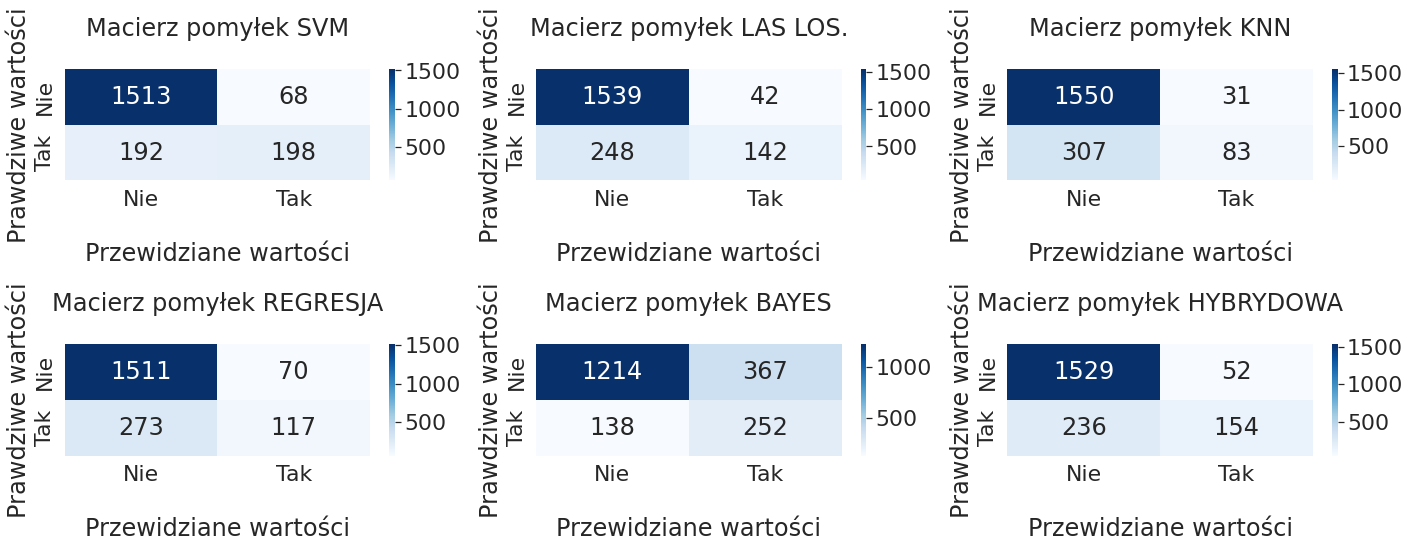

In [64]:
# ax6.axis('off')
fig.subplots_adjust(wspace=0.01)
fig

In [65]:
#TP, TN, FP, FN
SVM = [cm_SVM[1][1], cm_SVM[0][0], cm_SVM[0][1], cm_SVM[1][0]]
LAS = [cm_las[1][1], cm_las[0][0], cm_las[0][1], cm_las[1][0]]
KNN = [cm_knn[1][1], cm_knn[0][0], cm_knn[0][1], cm_knn[1][0]]
REG = [cm_lin[1][1], cm_lin[0][0], cm_lin[0][1], cm_lin[1][0]]
BAY = [cm_bayes[1][1], cm_bayes[0][0], cm_bayes[0][1], cm_bayes[1][0]]
HYB = [cm_hybryd[1][1], cm_hybryd[0][0], cm_hybryd[0][1], cm_hybryd[1][0]]

SVM.append(SVM[0] / (SVM[0] + SVM[3]))
SVM.append(SVM[0] / (SVM[0] + SVM[2]))
SVM.append((2 * SVM[0]) / (2 * SVM[0] + SVM[2] + SVM[3]))
SVM.append(wyniki_svm2[0])

LAS.append(LAS[0] / (LAS[0] + LAS[3]))
LAS.append(LAS[0] / (LAS[0] + LAS[2]))
LAS.append((2 * LAS[0]) / (2 * LAS[0] + LAS[2] + LAS[3]))
LAS.append(wyniki_rf2[0])

KNN.append(KNN[0] / (KNN[0] + KNN[3]))
KNN.append(KNN[0] / (KNN[0] + KNN[2]))
KNN.append((2 * KNN[0]) / (2 * KNN[0] + KNN[2] + KNN[3]))
KNN.append(wyniki_knn2[0])

REG.append(REG[0] / (REG[0] + REG[3]))
REG.append(REG[0] / (REG[0] + REG[2]))
REG.append((2 * REG[0]) / (2 * REG[0] + REG[2] + REG[3]))
REG.append(wyniki_reg2[0])

BAY.append(BAY[0] / (BAY[0] + BAY[3]))
BAY.append(BAY[0] / (BAY[0] + BAY[2]))
BAY.append((2 * BAY[0]) / (2 * BAY[0] + BAY[2] + BAY[3]))
BAY.append(wyniki_bay2[0])

HYB.append(HYB[0] / (HYB[0] + HYB[3]))
HYB.append(HYB[0] / (HYB[0] + HYB[2]))
HYB.append((2 * HYB[0]) / (2 * HYB[0] + HYB[2] + HYB[3]))
HYB.append(wyniki_hyb2[0])
    

wyniki_pomylek = pd.DataFrame(
    [SVM, LAS, KNN, REG, BAY, HYB],
    index = ['SVM', 'Las losowy', 'KNN', 'Regresja', 'Bayes', 'Hybrydowa'],
    columns = ['True Positive', 'True Negative', 'False Positive', 'False Negative', 'Czułość', 'Precyzja', 'F1-score', 'Total Accuracy'])
    
wyniki_pomylek

,True Positive,True Negative,False Positive,False Negative,Czułość,Precyzja,F1-score,Total Accuracy
SVM,198,1513,68,192,0.507692,0.744361,0.603659,0.861765
Las losowy,142,1539,42,248,0.364103,0.771739,0.494774,0.849285
KNN,83,1550,31,307,0.212821,0.728070,0.329365,0.837816
Regresja,117,1511,70,273,0.300000,0.625668,0.405546,0.814674
Bayes,252,1214,367,138,0.646154,0.407108,0.499504,0.727189
Hybrydowa,154,1529,52,236,0.394872,0.747573,0.516779,0.851110


Czułość - udział prawidłowo zaprognozowanych przypadków pozytywnych wśród wszystkich pozytywnych.<br>
Precyzja - wskazuje na to ile przypadków zaprognozowanych pozytywnie jest rzeczywiście pozytywnych.<br>
F1-score - jest to średnia harmoniczna precyzji i czułości, a co za tym idzie, stoduje się go gdy obie statystyki są dla nas równie istotne.

Każdy z wymienionych powyżej mierników im jest bliższy jedynki, tym lepsze według niego są wykorzystane do uzyskania tychże wyników metody.<br>

Ostatnim miernikiem, który został wykorzystany przy analizowaniu wyników wykorzystanych metod jest Total Accuracy, który przedstawia całkowity udział wszystkich poprawnie zaprognozowanych przypadków (zarówno pozytywnych jak i negatywnych) na tle całego zbioru danych.

# PODSUMOWANIE REZULTATÓW <a class="anchor" id="chapter51"></a>

Jak można zauważyć, dla wykorzystanego przez nas zestawu danych najlepsze Total Accuracy osiągnęliśmy przy wykorzystaniu metody SVM.
Tuż za nim plasowały się: hybrydowa, las losowy, KNN i regresja, zaś na samym końcu znalazł się Bayes.

Tak więc nie licząc naiwnego Bayesa, wyniki metod plasowały się powyżej 80% dokładności. Można by ją zwiększyć poprzez dobór innych cech niż użyte przez nas czy zmianę parametrów niektórych metod. Innym problemem ograniczającym dokładność może być fakt posiadania kilku różnych rodzajów nowotworów, których wystąpienie skutkuje otrzymaniem tego samego wyniku: rak na zdjęciu. Możliwe że w przypadku rozdzielenia poszczególnych rodzajów nowotworów na osobne grupy klasyfikujące, Accuracy wykorzystanych metod mogłoby wzrosnąć.

Dodatkowe informacje można wyciągnąć z wygenerowanych macierzy pomyłek. Widać z nich, że najwięcej TP (true positives), które w naszym przypadku oznaczają poprawnie wykryty nowotwór zwraca metoda Bayesa. Posiada ona jednak również najwięcej FP (false positives), czyli przypadków, w których zostaje wskazany rak pomimo że go nie ma.
Największą liczbą TN (true negatives) z kolei wykazał się KNN, wykazując podobną ich ilość co RF (random forest - las losowy), regresja, SVM czy hybrydowa. Metody posiadają również małe ilości FP (zdecydowanie mniejsze niż Bayes), jednak wykazują się też wysokim wskaźnikiem FN (false negative), czyli odrzucają możliwość nowotworu, pomimo że powinny go wykryć.

Podsumowując, pomimo posiadania najmniejszej wartości miernika Accuracy (zaledwie trochę powyżej 70%) spośród przebadanych metod, to klasyfikator Bayesowski posiada największy potencjał jeśli chodzi o wykorzystanie go np. w aplikacji do przedszpitalnej diagnozy zmian skórnych. Jest się tak z tego powodu, że pomimo generowania wielu fałszywych pozytywów, posiada najmniejszą ilość fałszywych negatywów, a co za tym idzie, jest mniejsza szansa na zidentyfikowanie formującego się nowotworu jako coś niegroźnego, a lepiej aby pieprzyk został oznaczony jako rak, co potem zostałoby wyjaśnione przy wizycie u lekarza, niż aby rak został zdiagnozowany jako pieprzyk. Z tego też powodu najważniejszym ostatecznie miernikiem skuteczności metod okazała się czułość danej metody.

# PRZYKŁAD UŻYCIA MODELI NA SZTUCZNYCH OBSERWACJACH: <a class="anchor" id="chapter6"></a>

Na koniec sprawdziliśmy działanie naszych modeli dla zdjęć spoza przygotowanej przez nas bazy. Wybraliśmy 20 zupełnie nowych zdjęć, wydobyliśmy z nich wartości cech, na których zastosowaliśmy wspomniane modele. Uzyskane wyniki zestawiliśmy w tabeli poniżej.

In [66]:
x_sztuczne = pd.read_csv('../cechy/cechy_inne.csv', sep=';')
x_uczacy = wszystkie_dane.drop(['Rak'], axis=1)
y_uczacy = wszystkie_dane['Rak']

# Standaryzacja danych
sc2 = StandardScaler()
sc2.fit(x_uczacy)
x_uczacy = sc2.transform(x_uczacy)
x_sztuczne = sc2.transform(x_sztuczne)

In [67]:
%%capture
model_SVM.fit(x_uczacy, y_uczacy)
model_las_losowy.fit(x_uczacy, y_uczacy)
model_Liniowy = LogisticRegression(max_iter = 10000)
model_Liniowy.fit(x_uczacy, y_uczacy)
model_KNN.fit(x_uczacy, y_uczacy)
model_bayes.fit(x_uczacy, y_uczacy)

In [68]:
SVM_przewidziane = model_SVM.predict(x_sztuczne)
LAS_przewidziane = model_las_losowy.predict(x_sztuczne)
LIN_przewidziane = model_Liniowy.predict(x_sztuczne)
KNN_przewidziane = model_KNN.predict(x_sztuczne)
BAY_przewidziane = model_bayes.predict(x_sztuczne)

dataframe_y = pd.DataFrame(
                            list(zip(SVM_przewidziane, LAS_przewidziane, KNN_przewidziane)),
                            columns = ['SVM','Las losowy','KNN']
                            )
wynik_hybrydowy = dataframe_y.mode(axis=1)
wynik_hybrydowy.columns=['Hybrydowa']

wyniki_z_modeli = list(zip(
        SVM_przewidziane,
        LAS_przewidziane,
        LIN_przewidziane,
        KNN_przewidziane,
        BAY_przewidziane
        ))

In [69]:
dataframe_przewidziane_sztuczne_0 = pd.DataFrame(
    wyniki_z_modeli,
    columns = ['SVM','Las losowy','Regresja','KNN','Bayes']
    )
dataframe_przewidziane_sztuczne = dataframe_przewidziane_sztuczne_0.join(wynik_hybrydowy)

dataframe_przewidziane_sztuczne

,SVM,Las losowy,Regresja,KNN,Bayes,Hybrydowa
0,0,0,1,0,1,0
1,0,0,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
5,0,0,0,0,0,0
6,0,0,0,0,1,0
7,0,0,0,0,0,0
8,1,0,0,1,0,1
9,0,0,0,0,1,0


# Bibliografia <a class="anchor" id="chapter7"></a>

### Źródło wykorzystanych danych/zdjęć:
Tschandl, Philipp, 2018, "The HAM10000 dataset, a large collection of multi-source dermatoscopic images of common pigmented skin lesions", https://doi.org/10.7910/DVN/DBW86T, Harvard Dataverse, V3, UNF:6:/APKSsDGVDhwPBWzsStU5A==

### Porównanie klasyfikatorów w analizie obrazu oraz sugestie odnośnie cech do wykorzystania:
Kruk M, Kozera R, Osowski S, et al. Computerized classification system for the identification of soil microorganisms. AIP Conference Proceedings. 2015;1648. doi: 10.1063/1.4912894.

### Wybrane problemy predykcji i klasyfikacji sieci SVM w elektrotechnice i bioinżynierii:
https://www.ee.pw.edu.pl/wp-content/uploads/2012/11/autoreferat.pdf

### Analiza obrazów z użyciem Random Forest:
Lowe, Barrett & Kulkarni, Arun. (2015). Multispectral Image Analysis Using Random Forest. International Journal on Soft Computing. 6. 1-14. 10.5121/ijsc.2015.6101.

Yali Amit, Donald Geman; Shape Quantization and Recognition with Randomized Trees. Neural Comput 1997; 9 (7): 1545–1588. doi: https://doi.org/10.1162/neco.1997.9.7.1545

### Statystyki z macierzy pomyłek:
https://www.statystyczny.pl/macierz-bledow-raport-dokladnosc-czulosc-precyzja/